<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Code/test_pv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

In [27]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()


#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss ,balanced_accuracy_score,matthews_corrcoef
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer,roc_curve, auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score 

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
path='/content/drive/My Drive/Data/GFG_challenge/data.json'
with open(path) as json_file:
    data = json.load(json_file)
print(len(data))
print(len(data[0]))

1
117511324


In [3]:
df=pd.read_json(data[0])
print(df.shape)
df

(191287, 33)


days_since_first_order  days_since_last_order  ...  revenue   customer_id
0                         2783                   1487  ...   468.80  3.017001e+09
1                         2772                   1296  ...   109.09  3.017108e+09
2                         2773                   1929  ...   448.54  3.017126e+09
3                         2767                      6  ...  1872.81  3.017185e+09
4                         1430                    826  ...   301.17  3.017193e+09
...                        ...                    ...  ...      ...           ...
191282                    2223                   2223  ...   163.63  3.706982e+09
191283                    2234                   2234  ...   154.50  3.706984e+09
191284                    2082                    252  ...   990.24  3.706994e+09
191285                    2222                   1063  ...   679.65  3.706998e+09
191286                    2082                    375  ...   544.63  3.707002e+09

[191287 rows x 33 columns]

In [4]:
df.dtypes

days_since_first_order        int64
days_since_last_order         int64
is_newsletter_subscriber     object
orders                        int64
items                         int64
returns                       int64
different_addresses           int64
shipping_addresses            int64
devices                       int64
vouchers                      int64
cc_payments                   int64
paypal_payments               int64
afterpay_payments             int64
female_items                  int64
male_items                    int64
unisex_items                  int64
wapp_items                    int64
wftw_items                    int64
mapp_items                    int64
wacc_items                    int64
macc_items                    int64
mftw_items                    int64
sprt_items                    int64
msite_orders                  int64
desktop_orders                int64
android_orders                int64
ios_orders                    int64
work_orders                 

In [5]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['is_newsletter_subscriber']=le.fit_transform(df['is_newsletter_subscriber'])

In [6]:
df.isnull().sum()

days_since_first_order      0
days_since_last_order       0
is_newsletter_subscriber    0
orders                      0
items                       0
returns                     0
different_addresses         0
shipping_addresses          0
devices                     0
vouchers                    0
cc_payments                 0
paypal_payments             0
afterpay_payments           0
female_items                0
male_items                  0
unisex_items                0
wapp_items                  0
wftw_items                  0
mapp_items                  0
wacc_items                  0
macc_items                  0
mftw_items                  0
sprt_items                  0
msite_orders                0
desktop_orders              0
android_orders              0
ios_orders                  0
work_orders                 0
home_orders                 0
parcelpoint_orders          0
coupon_discount_applied     0
revenue                     0
customer_id                 0
dtype: int

# EDA

In [7]:
df.describe()

days_since_first_order  ...   customer_id
count           191287.000000  ...  1.912870e+05
mean              2325.415344  ...  3.387436e+09
std                382.012579  ...  2.094103e+08
min                  3.000000  ...  3.016870e+09
25%               2271.000000  ...  3.202564e+09
50%               2414.000000  ...  3.398475e+09
75%               2526.000000  ...  3.567305e+09
max               2813.000000  ...  3.801194e+09

[8 rows x 33 columns]

In [8]:
#df.hist(bins=50, figsize=(20,15))
#plt.show()

In [9]:
for name in df.columns:
  print(name +':'+ str(len(df[name].unique())))

days_since_first_order:2786
days_since_last_order:2329
is_newsletter_subscriber:2
orders:301
items:674
returns:453
different_addresses:157
shipping_addresses:40
devices:4
vouchers:120
cc_payments:526
paypal_payments:412
afterpay_payments:266
female_items:620
male_items:242
unisex_items:56
wapp_items:527
wftw_items:152
mapp_items:201
wacc_items:115
macc_items:67
mftw_items:66
sprt_items:30
msite_orders:172
desktop_orders:215
android_orders:84
ios_orders:178
work_orders:131
home_orders:237
parcelpoint_orders:61
coupon_discount_applied:6598
revenue:109417
customer_id:191287


# Features engineering

In [10]:
df_copy=df.copy()
df_purchase=df_copy.iloc[:,13:22].copy()

In [11]:
df_purchase['female_items_new']=df_purchase['wapp_items']+df_purchase['wftw_items']+df_purchase['wacc_items'] 
df_purchase['male_items_new']=df_purchase['mapp_items']+df_purchase['mftw_items']+df_purchase['macc_items'] 
# Add 1 to female and male items to avoid 
df_purchase['percentage_female_items']=(df_purchase['female_items_new']+1)/(df_purchase['male_items_new']+df_purchase['female_items_new']+2)

In [12]:
df_purchase

female_items  male_items  ...  male_items_new  percentage_female_items
0                  0           4  ...               5                 0.142857
1                  0           0  ...               1                 0.333333
2                  4           0  ...               0                 0.833333
3                 28           1  ...               5                 0.785714
4                  0           6  ...               6                 0.125000
...              ...         ...  ...             ...                      ...
191282             1           0  ...               0                 0.500000
191283             1           0  ...               0                 0.666667
191284             8          17  ...              17                 0.333333
191285             0          11  ...              11                 0.076923
191286             0          10  ...              10                 0.083333

[191287 rows x 12 columns]

In [13]:
df_purchase['total_item']=df_purchase['female_items_new']+df_purchase['male_items_new']
df_purchase['total_item'].describe()

count    191287.000000
mean         23.531118
std          49.105874
min           0.000000
25%           2.000000
50%           7.000000
75%          24.000000
max        2902.000000
Name: total_item, dtype: float64

Two columns are not correct: female_items and male_items. We will replace these columns with female_items_news and male_items_news later

In [14]:
df_purchase['percentage_female_items'].describe()

count    191287.000000
mean          0.691969
std           0.268963
min           0.002217
25%           0.600000
50%           0.785714
75%           0.900000
max           0.998825
Name: percentage_female_items, dtype: float64

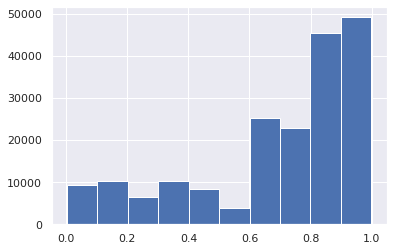

In [15]:
df_purchase['percentage_female_items'].hist()

In [16]:
print(len(df_purchase[df_purchase['percentage_female_items']>=0.8])) # female gender
print(len(df_purchase[df_purchase['percentage_female_items']<=0.2])) # male gender

94582
19412


In [17]:
df_purchase['gender']=df_purchase['percentage_female_items'].\
                      apply(lambda x: 1 if x>=0.8 else 0 if x<=0.2 else -1)
# 1: female ; 0: male ; -1: unknow

In [18]:
df_purchase['gender'].value_counts()

 1    94582
-1    77293
 0    19412
Name: gender, dtype: int64

# Create new dataframe for supervised learning

In [19]:
df_purchase.head()

female_items  male_items  ...  total_item  gender
0             0           4  ...           5       0
1             0           0  ...           1      -1
2             4           0  ...           4       1
3            28           1  ...          26      -1
4             0           6  ...           6       0

[5 rows x 14 columns]

In [20]:
#Drop two corrupted columns:
df_copy=df_copy.drop(['female_items','male_items'],axis=1)

In [21]:
df_copy

days_since_first_order  days_since_last_order  ...  revenue   customer_id
0                         2783                   1487  ...   468.80  3.017001e+09
1                         2772                   1296  ...   109.09  3.017108e+09
2                         2773                   1929  ...   448.54  3.017126e+09
3                         2767                      6  ...  1872.81  3.017185e+09
4                         1430                    826  ...   301.17  3.017193e+09
...                        ...                    ...  ...      ...           ...
191282                    2223                   2223  ...   163.63  3.706982e+09
191283                    2234                   2234  ...   154.50  3.706984e+09
191284                    2082                    252  ...   990.24  3.706994e+09
191285                    2222                   1063  ...   679.65  3.706998e+09
191286                    2082                    375  ...   544.63  3.707002e+09

[191287 rows x 31 columns]

In [22]:
# Add new features columns:
df_copy['female_items_new']=df_purchase['female_items_new']
df_copy['male_items_new']=df_purchase['male_items_new']
df_copy['percentage_female_items']=df_purchase['percentage_female_items']
df_copy['gender']=df_purchase['gender']
df_copy.head()

days_since_first_order  ...  gender
0                    2783  ...       0
1                    2772  ...      -1
2                    2773  ...       1
3                    2767  ...      -1
4                    1430  ...       0

[5 rows x 35 columns]

In [23]:
df_final=df_copy[df_copy['gender'] != -1].copy()

In [24]:
print(df_copy.shape)
print(df_final.shape)
print(len(df_final)/len(df_copy))

(191287, 35)
(113994, 35)
0.5959317674489119


We only use 60% data with high confidence in the gender classification for supervised training purpose

# Build model

In [ ]:
X=df_final.drop(['gender','customer_id','percentage_female_items'],axis=1)
y=df_final['gender']
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)
# use stratify to ensure balanced gender ratio between train and test set
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(91195, 32) (91195,)
(22799, 32) (22799,)


In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print(confusion_matrix(y_test,y_pred))
#print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3882     0]
 [    0 18917]]
Balanced accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3882
           1       1.00      1.00      1.00     18917

    accuracy                           1.00     22799
   macro avg       1.00      1.00      1.00     22799
weighted avg       1.00      1.00      1.00     22799



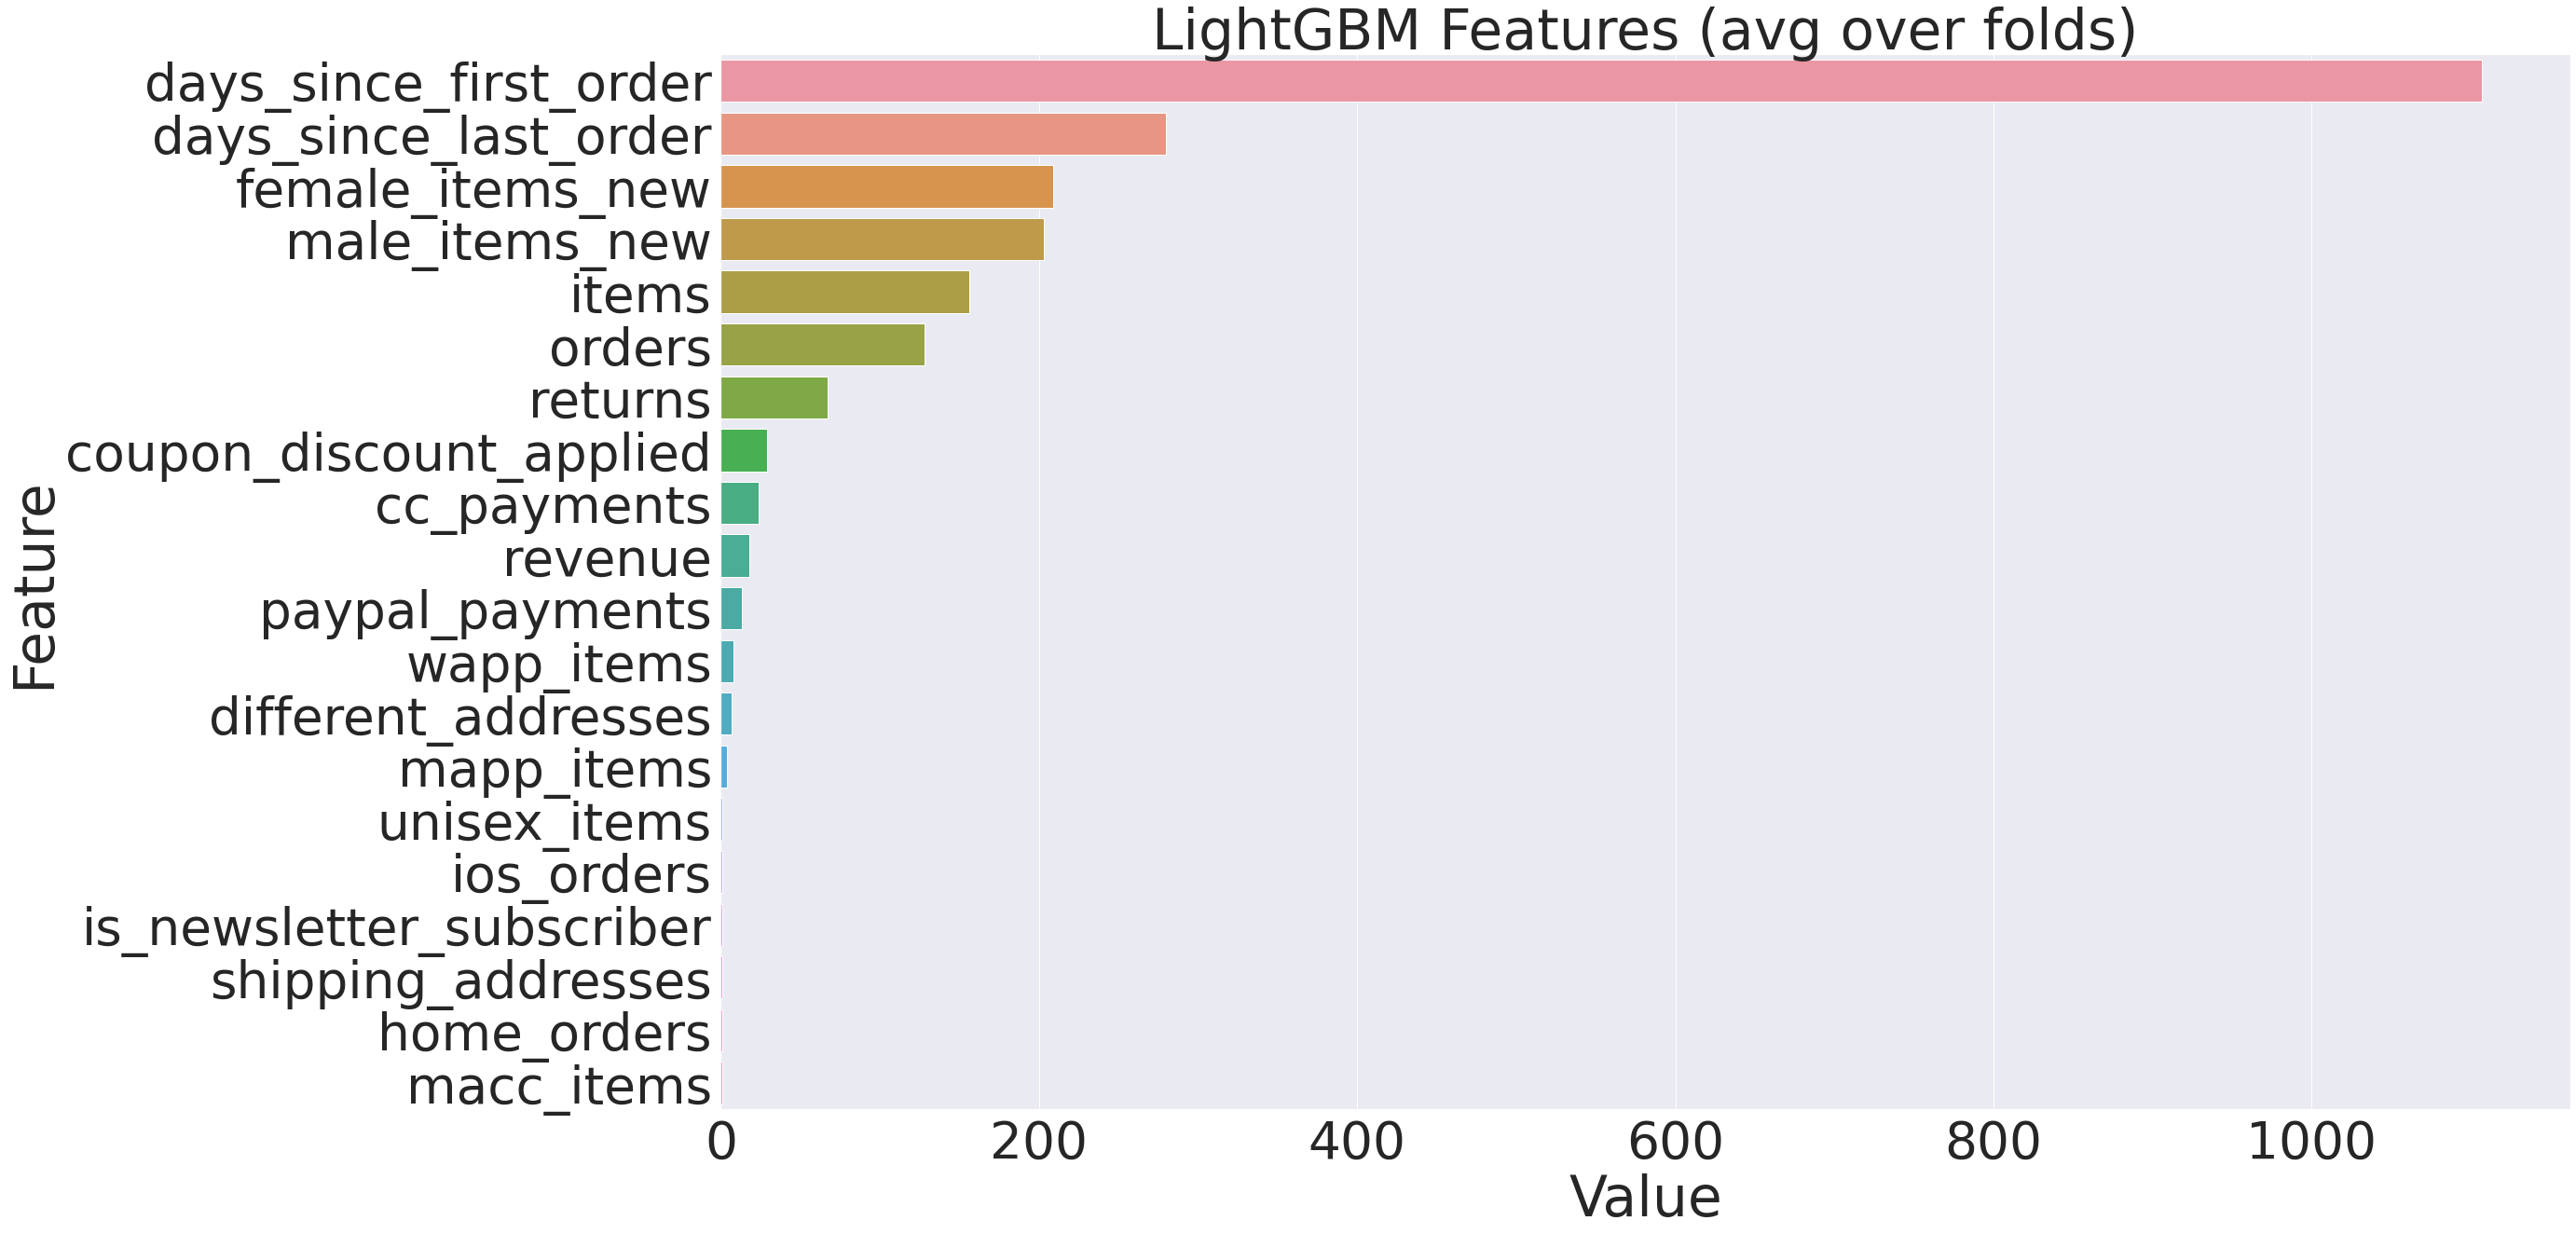

In [ ]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    #plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(lgbm, X_train , num = 20)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)  
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
#print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3882     0]
 [    0 18917]]
Balanced accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3882
           1       1.00      1.00      1.00     18917

    accuracy                           1.00     22799
   macro avg       1.00      1.00      1.00     22799
weighted avg       1.00      1.00      1.00     22799



In [ ]:
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

[9.87745563e-05 1.44434679e-03 2.08796195e-05 1.09490638e-02
 1.04834856e-02 5.59032927e-03 5.54001627e-05 3.19264549e-04
 3.90196407e-03 1.56444907e-03 1.37437120e-03 3.22382772e-04
 1.46392152e-04 1.14597146e-03 2.03797253e-01 1.03048591e-01
 9.28405793e-02 3.83363595e-02 2.58547841e-02 4.66300022e-02
 1.21265480e-04 4.71441702e-03 1.87186683e-03 1.83852989e-05
 1.43895863e-04 6.23181675e-05 7.07816941e-03 1.51103926e-05
 2.03001809e-04 1.26035132e-02 2.88933387e-01 1.36310025e-01]


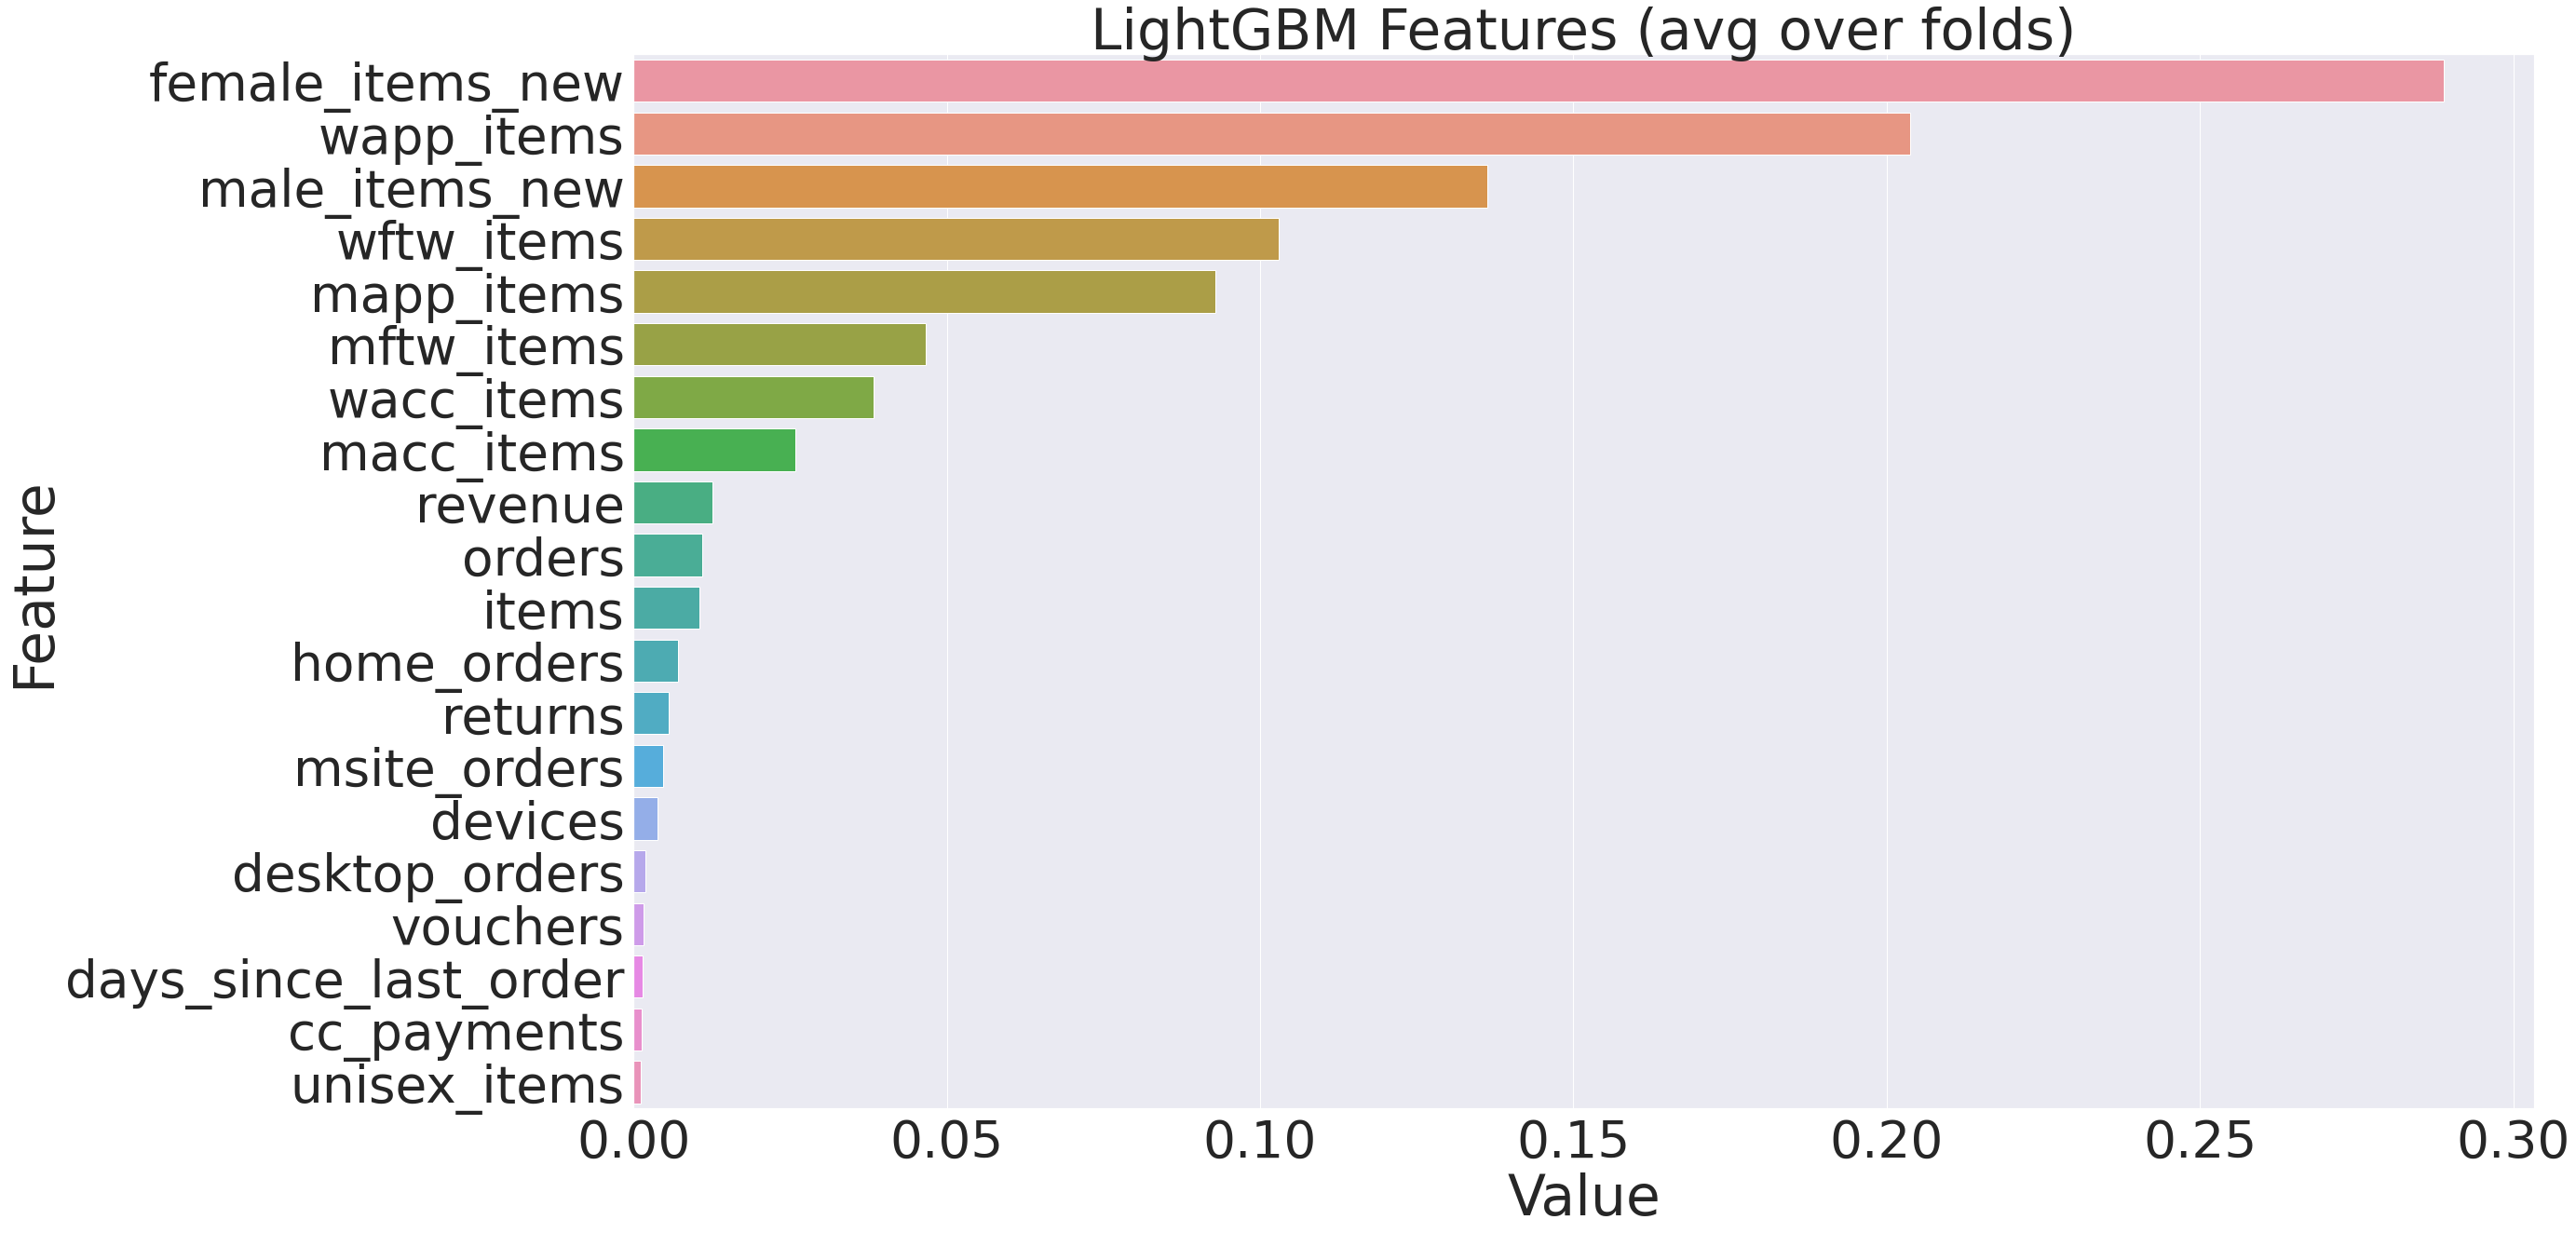

In [ ]:
plotImp(rf, X_train , num = 20)

# Explain model with SHAP

## Explain with xgboost

In [ ]:
!pip install shap

In [ ]:
import shap #SHAP package

In [ ]:
import xgboost
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

In [ ]:

# load JS visualization code to notebook
shap.initjs()
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [ ]:
print(X_train.shape)
print(shap_values.shape)

(91195, 32)
(91195, 32)


In [ ]:
shap_values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.09932788,
        0.01357836],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09932788,
        0.01357836],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09932788,
        0.01357836],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.09932788,
        0.01357836],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09932788,
        0.01357836],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09932788,
        0.01357836]], dtype=float32)

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:10], X_train[:10])

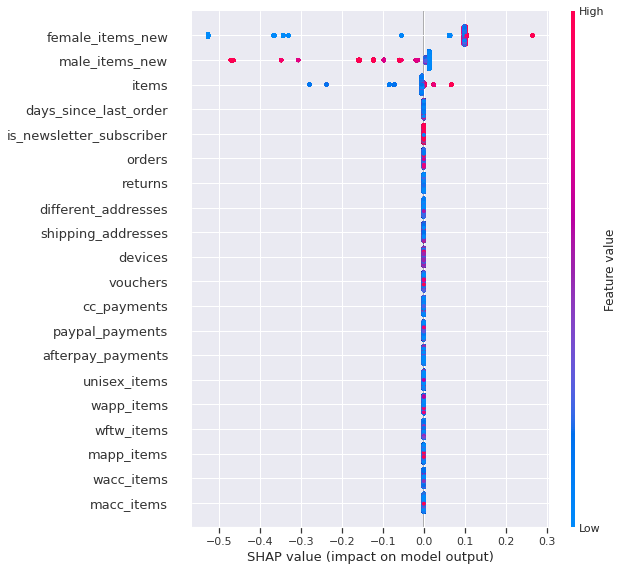

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

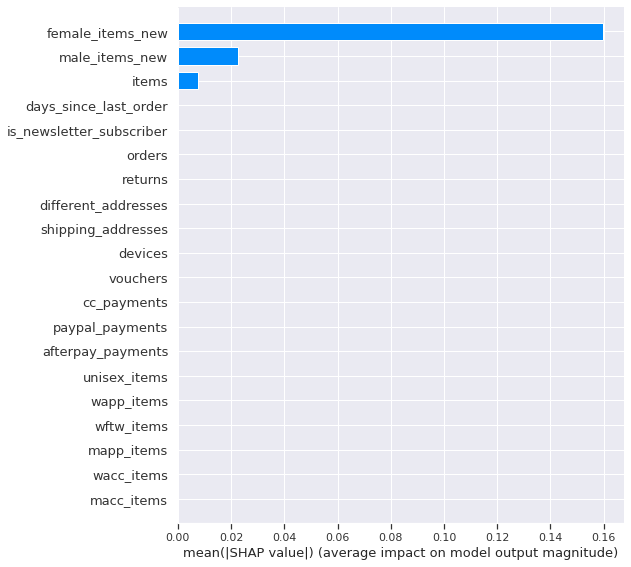

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

## Explain model with LGBM

In [ ]:
model=LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

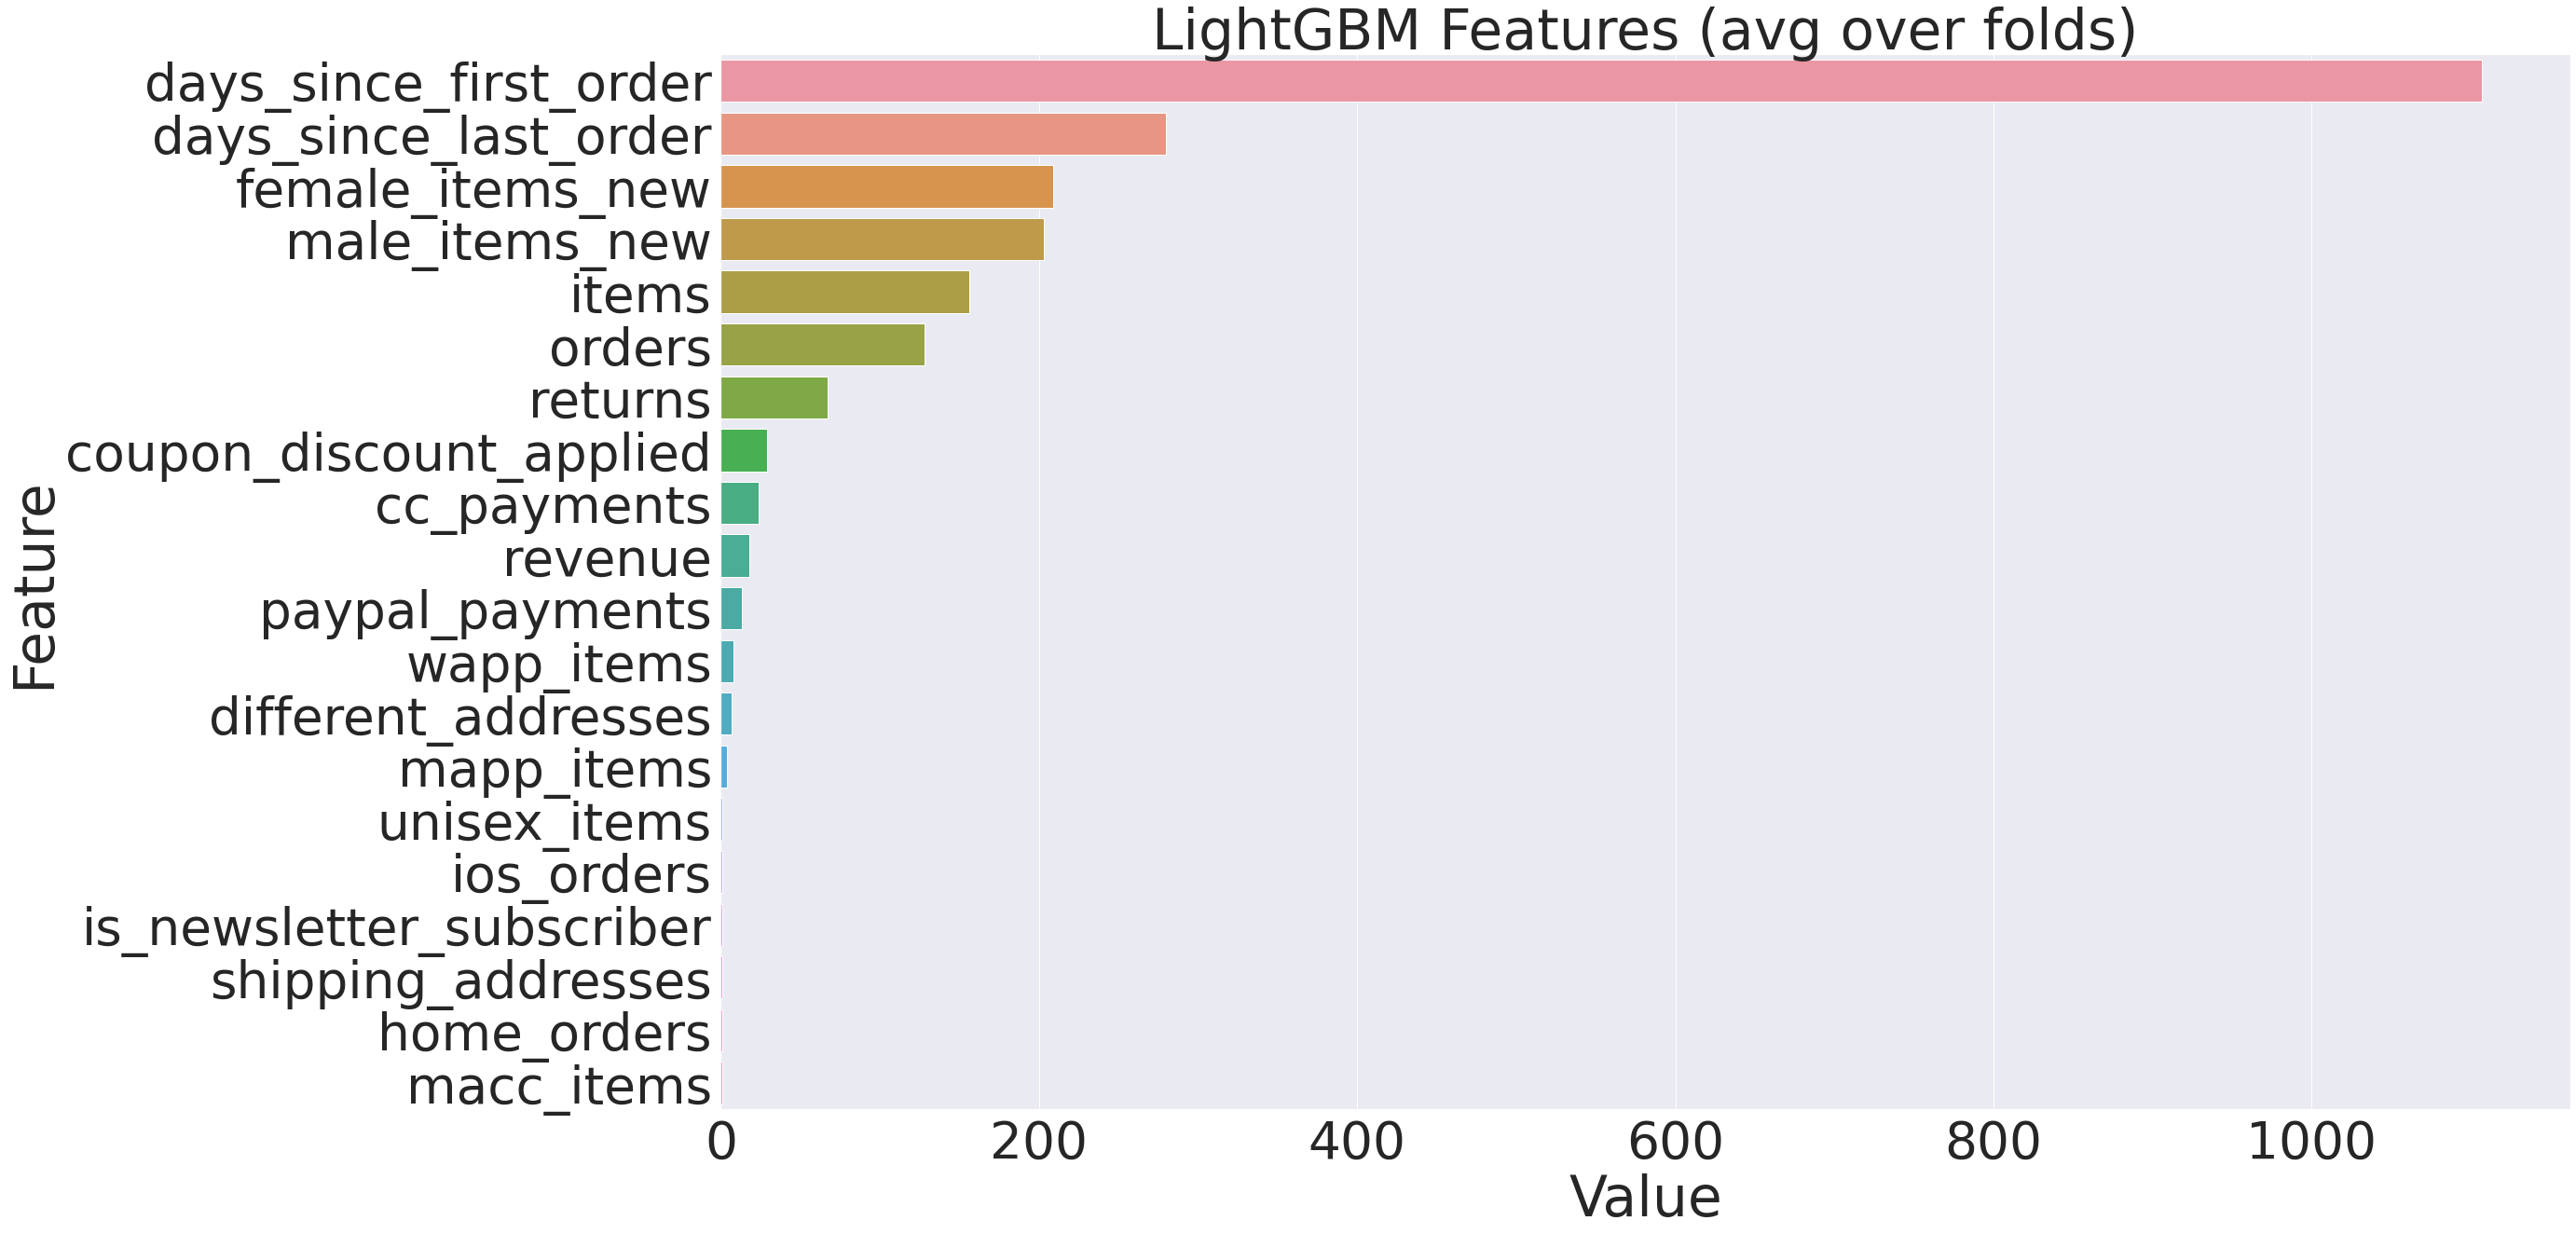

In [ ]:
plotImp(lgbm, X_train , num = 20)

In [ ]:

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
explainer.expected_value

[-8.022470846555255, 8.022470846555255]

In [ ]:
shap_values

[array([[ 2.30437685e-15, -1.76582991e-15, -4.06575815e-20, ...,
         -1.72574493e-16, -3.36950205e+00, -4.78244187e-01],
        [-1.79747168e-16, -2.56620490e-16,  1.35525272e-19, ...,
         -2.71453731e-16, -3.36950205e+00, -4.78244187e-01],
        [-8.75060929e-15, -3.67642792e-16, -4.06575815e-20, ...,
          7.72392404e-17, -3.36950205e+00, -4.78244187e-01],
        ...,
        [-1.77742749e-15, -3.17334117e-16,  1.35525272e-19, ...,
         -3.33470095e-16, -3.36950205e+00, -4.78244187e-01],
        [ 6.82351988e-14,  6.77136773e-16, -4.06575815e-20, ...,
         -1.55805273e-15, -3.36950205e+00, -4.78244187e-01],
        [ 5.17778772e-14,  1.34672004e-14,  1.35525272e-19, ...,
          8.93280946e-17, -3.36950205e+00, -4.78244187e-01]]),
 array([[-2.30437685e-15,  1.76582991e-15,  4.06575815e-20, ...,
          1.72574493e-16,  3.36950205e+00,  4.78244187e-01],
        [ 1.79747168e-16,  2.56620490e-16, -1.35525272e-19, ...,
          2.71453731e-16,  3.36950205e

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[1], shap_values[1][:10], X_train.iloc[:10])

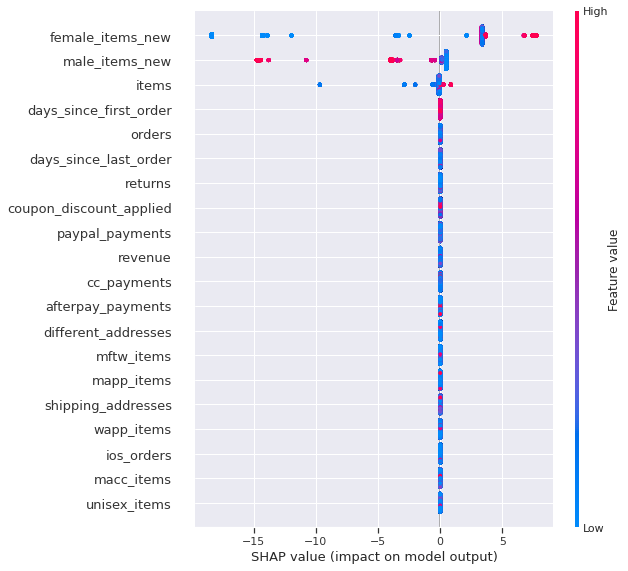

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values[1], X_train)

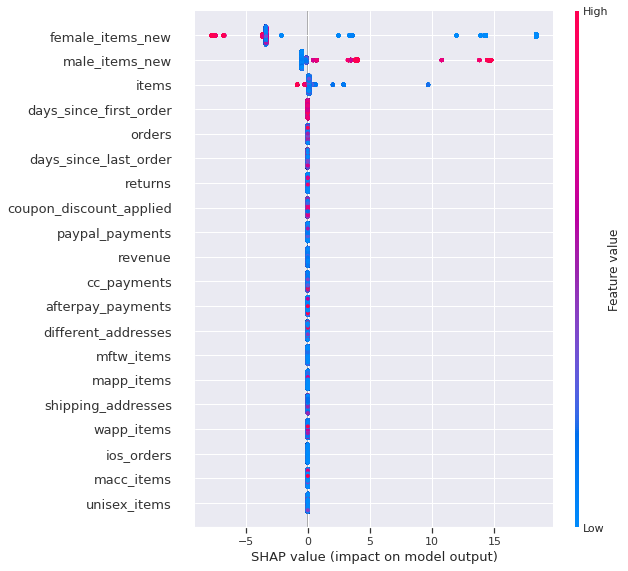

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], X_train)

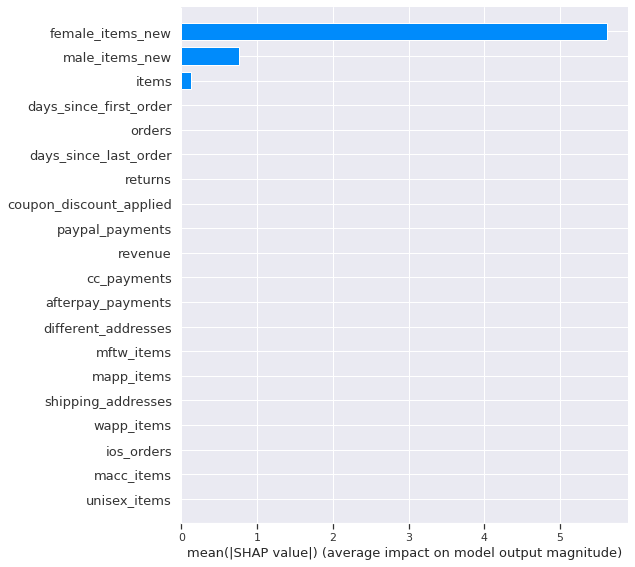

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

## Explain with RF

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

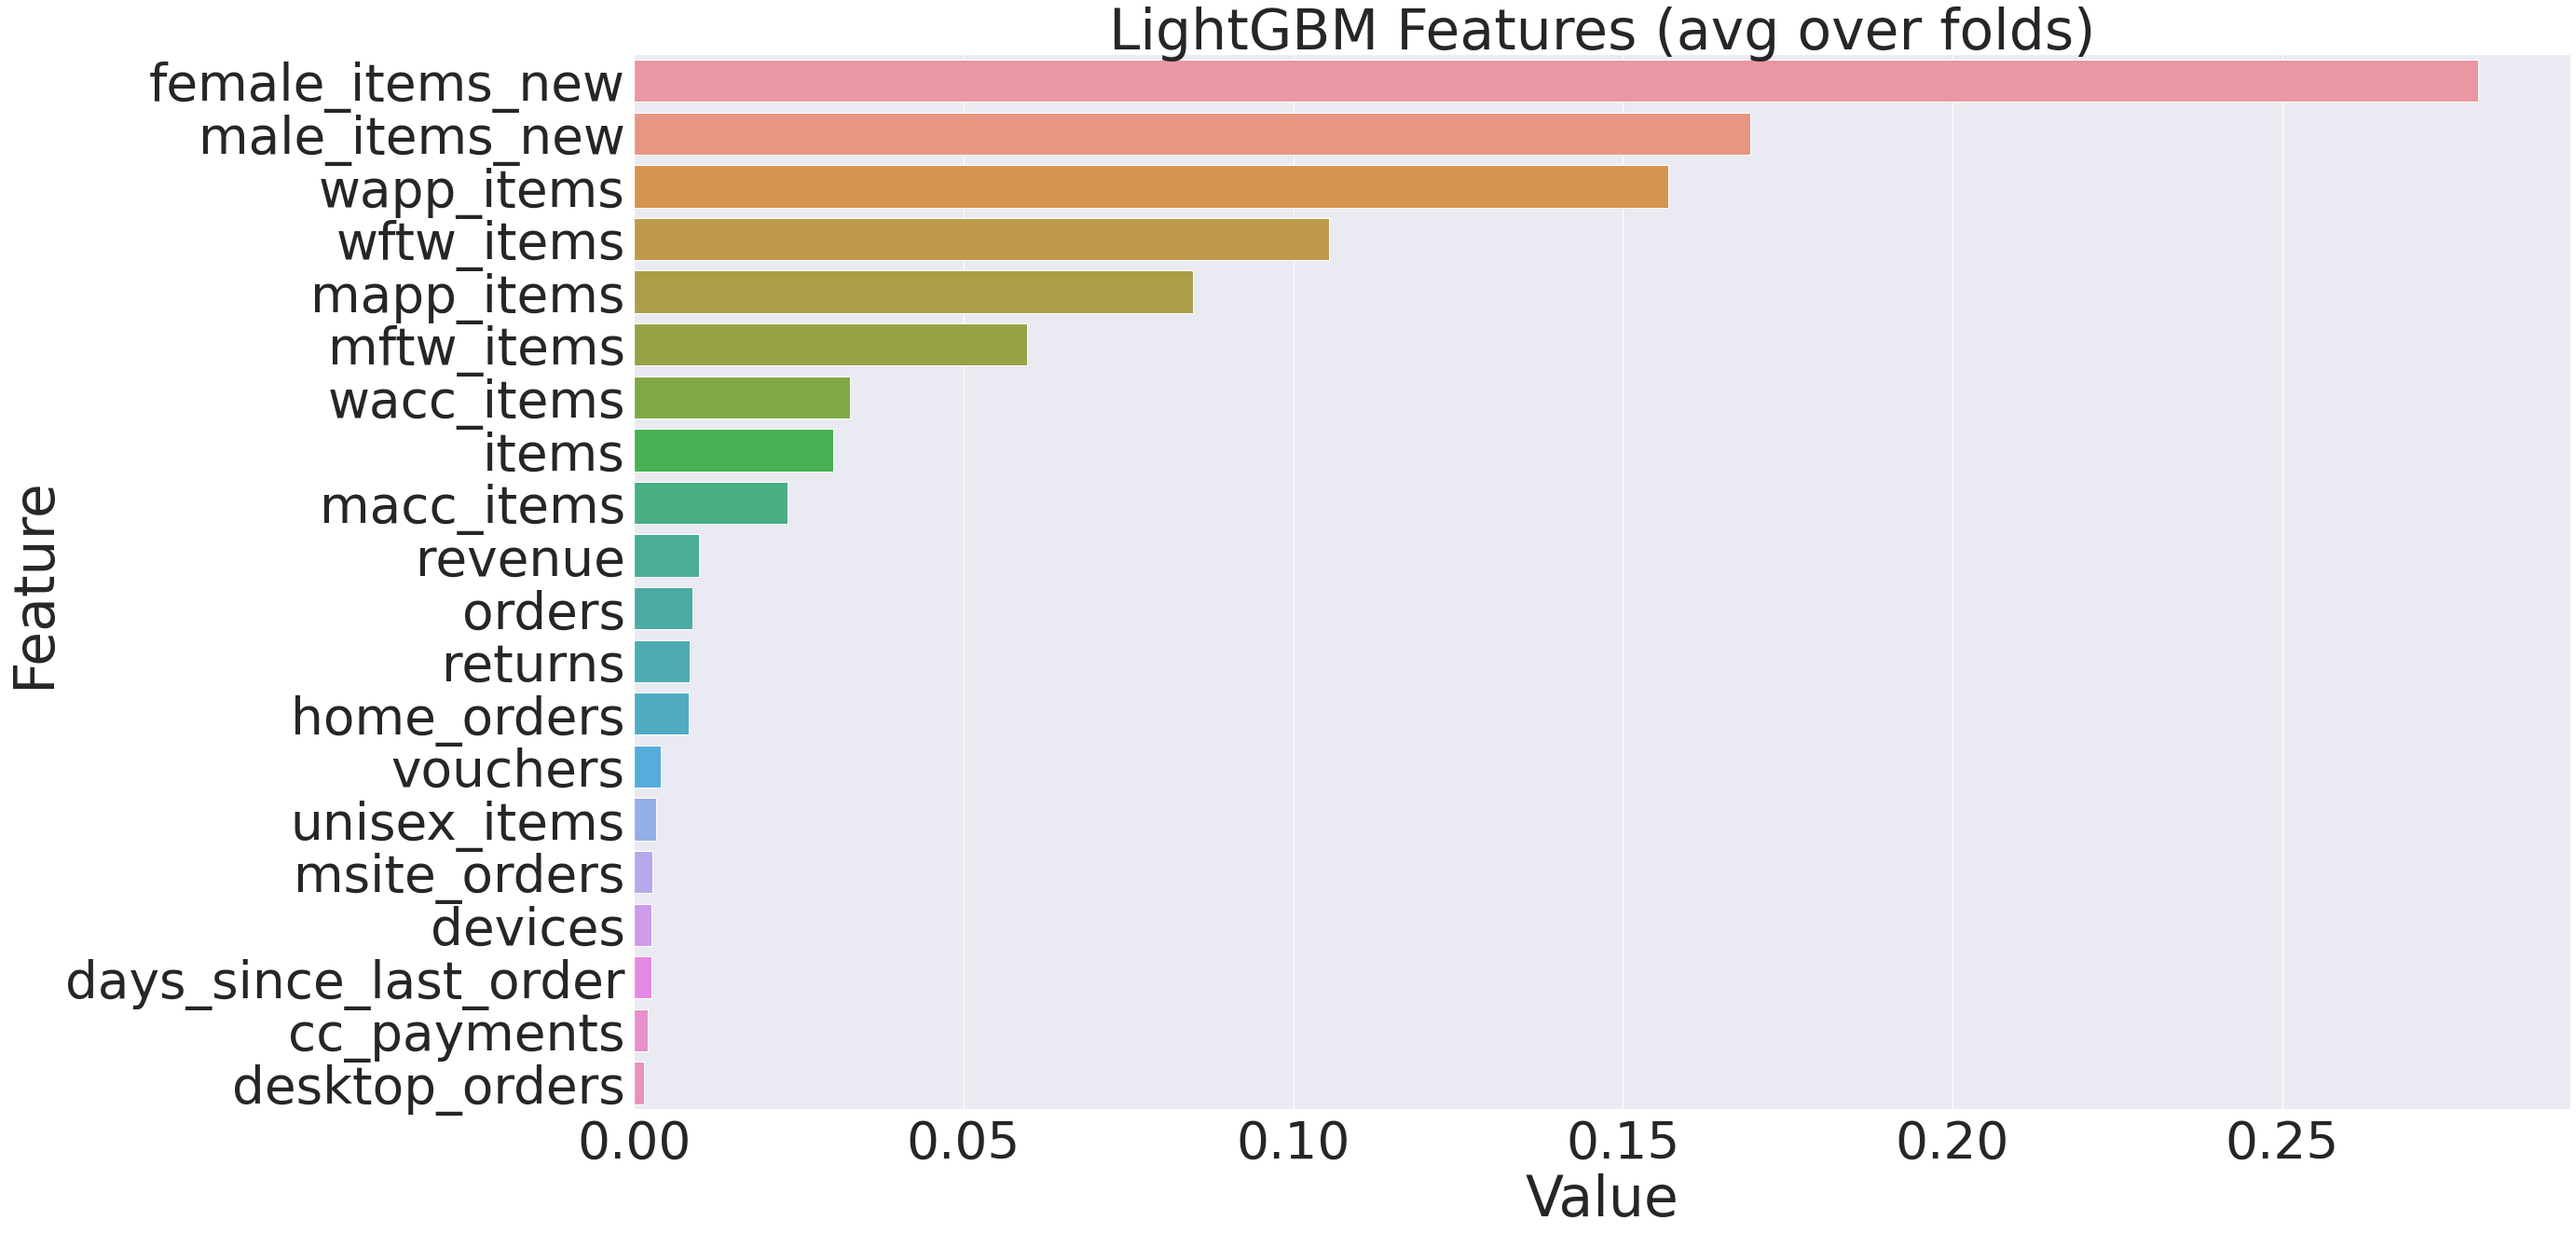

In [ ]:
plotImp(rf, X_train , num = 20)

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_values

[array([[-4.62379569e-05, -5.25707067e-04, -1.60663346e-05, ...,
         -1.19733863e-03, -5.58543575e-02, -3.06649490e-02],
        [-4.42658241e-05,  6.15671871e-04,  6.59265603e-05, ...,
         -1.16890456e-03, -5.83451031e-02, -3.35658561e-02],
        [ 4.16635888e-05, -6.17538423e-04,  6.78166553e-05, ...,
          9.00829942e-04, -3.74820451e-02, -8.83407655e-02],
        ...,
        [-1.21993919e-04, -2.84980189e-04,  8.23092067e-05, ...,
         -2.05076430e-03, -5.57620452e-02, -4.08666394e-02],
        [ 3.36842885e-06, -1.00652173e-03, -2.79048228e-05, ...,
         -6.70141249e-04, -4.40117279e-02, -5.23337058e-02],
        [ 2.60727486e-07,  6.29451803e-04,  4.35407637e-05, ...,
          1.87304449e-03, -2.20048335e-02, -7.83456089e-02]]),
 array([[ 4.62379569e-05,  5.25707067e-04,  1.60663346e-05, ...,
          1.19733863e-03,  5.58543575e-02,  3.06649490e-02],
        [ 4.42658241e-05, -6.15671871e-04, -6.59265603e-05, ...,
          1.16890456e-03,  5.83451031e

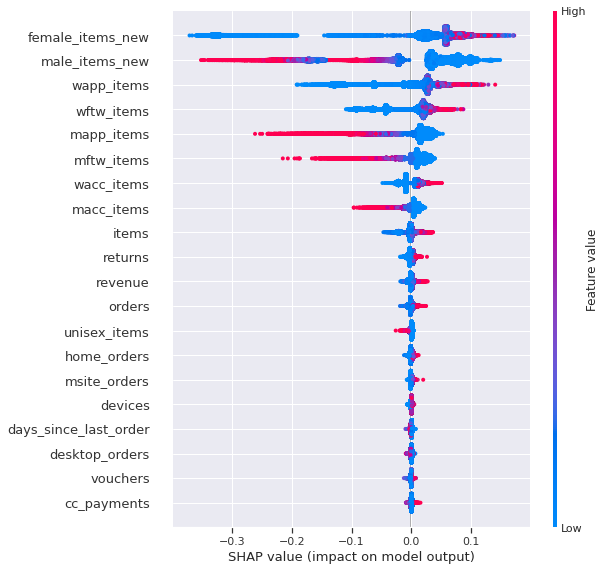

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values[1], X_train)

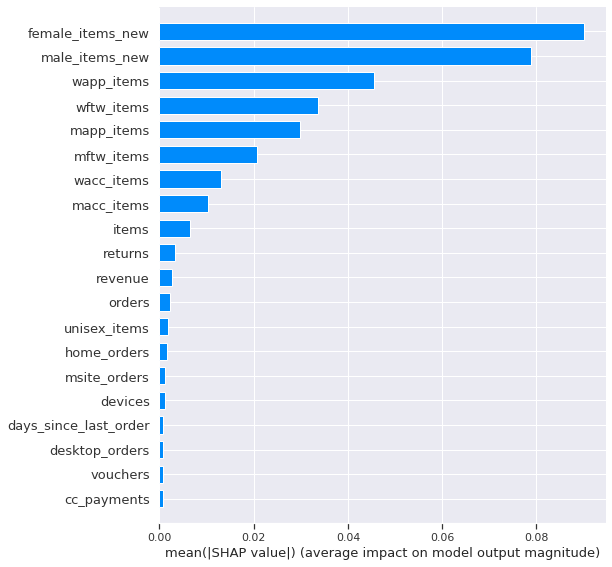

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

## All feature important by each model

In [ ]:
classifiers = {
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting   
}

RF
Balanced accuracy score: 1.0


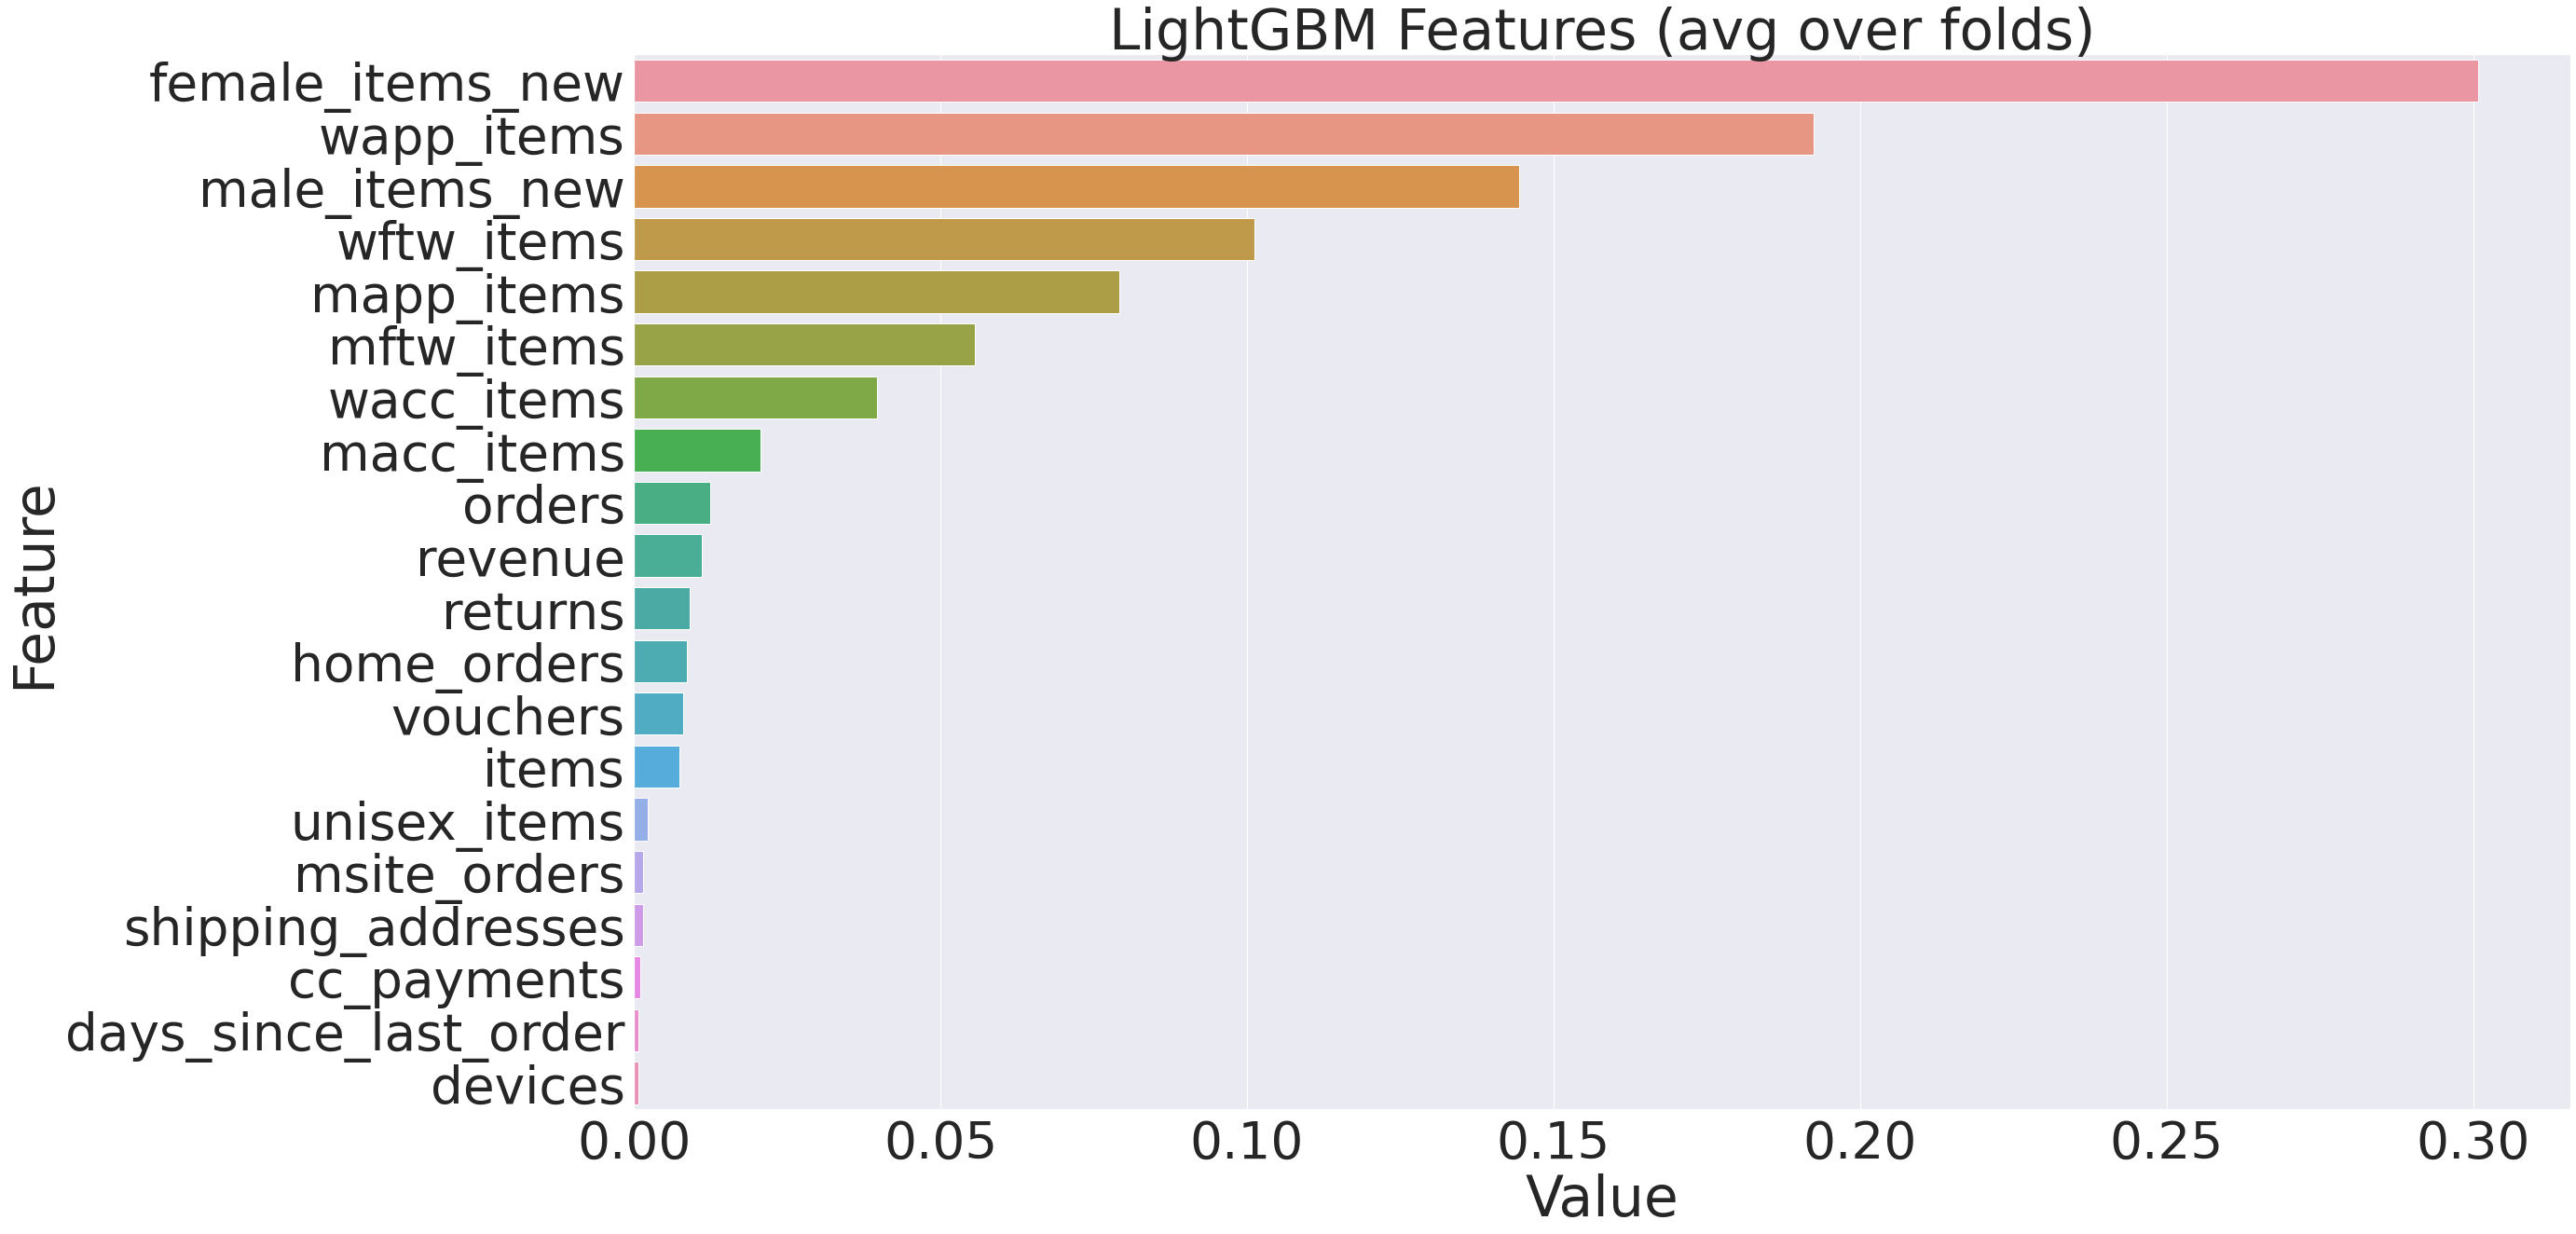

AB
Balanced accuracy score: 1.0


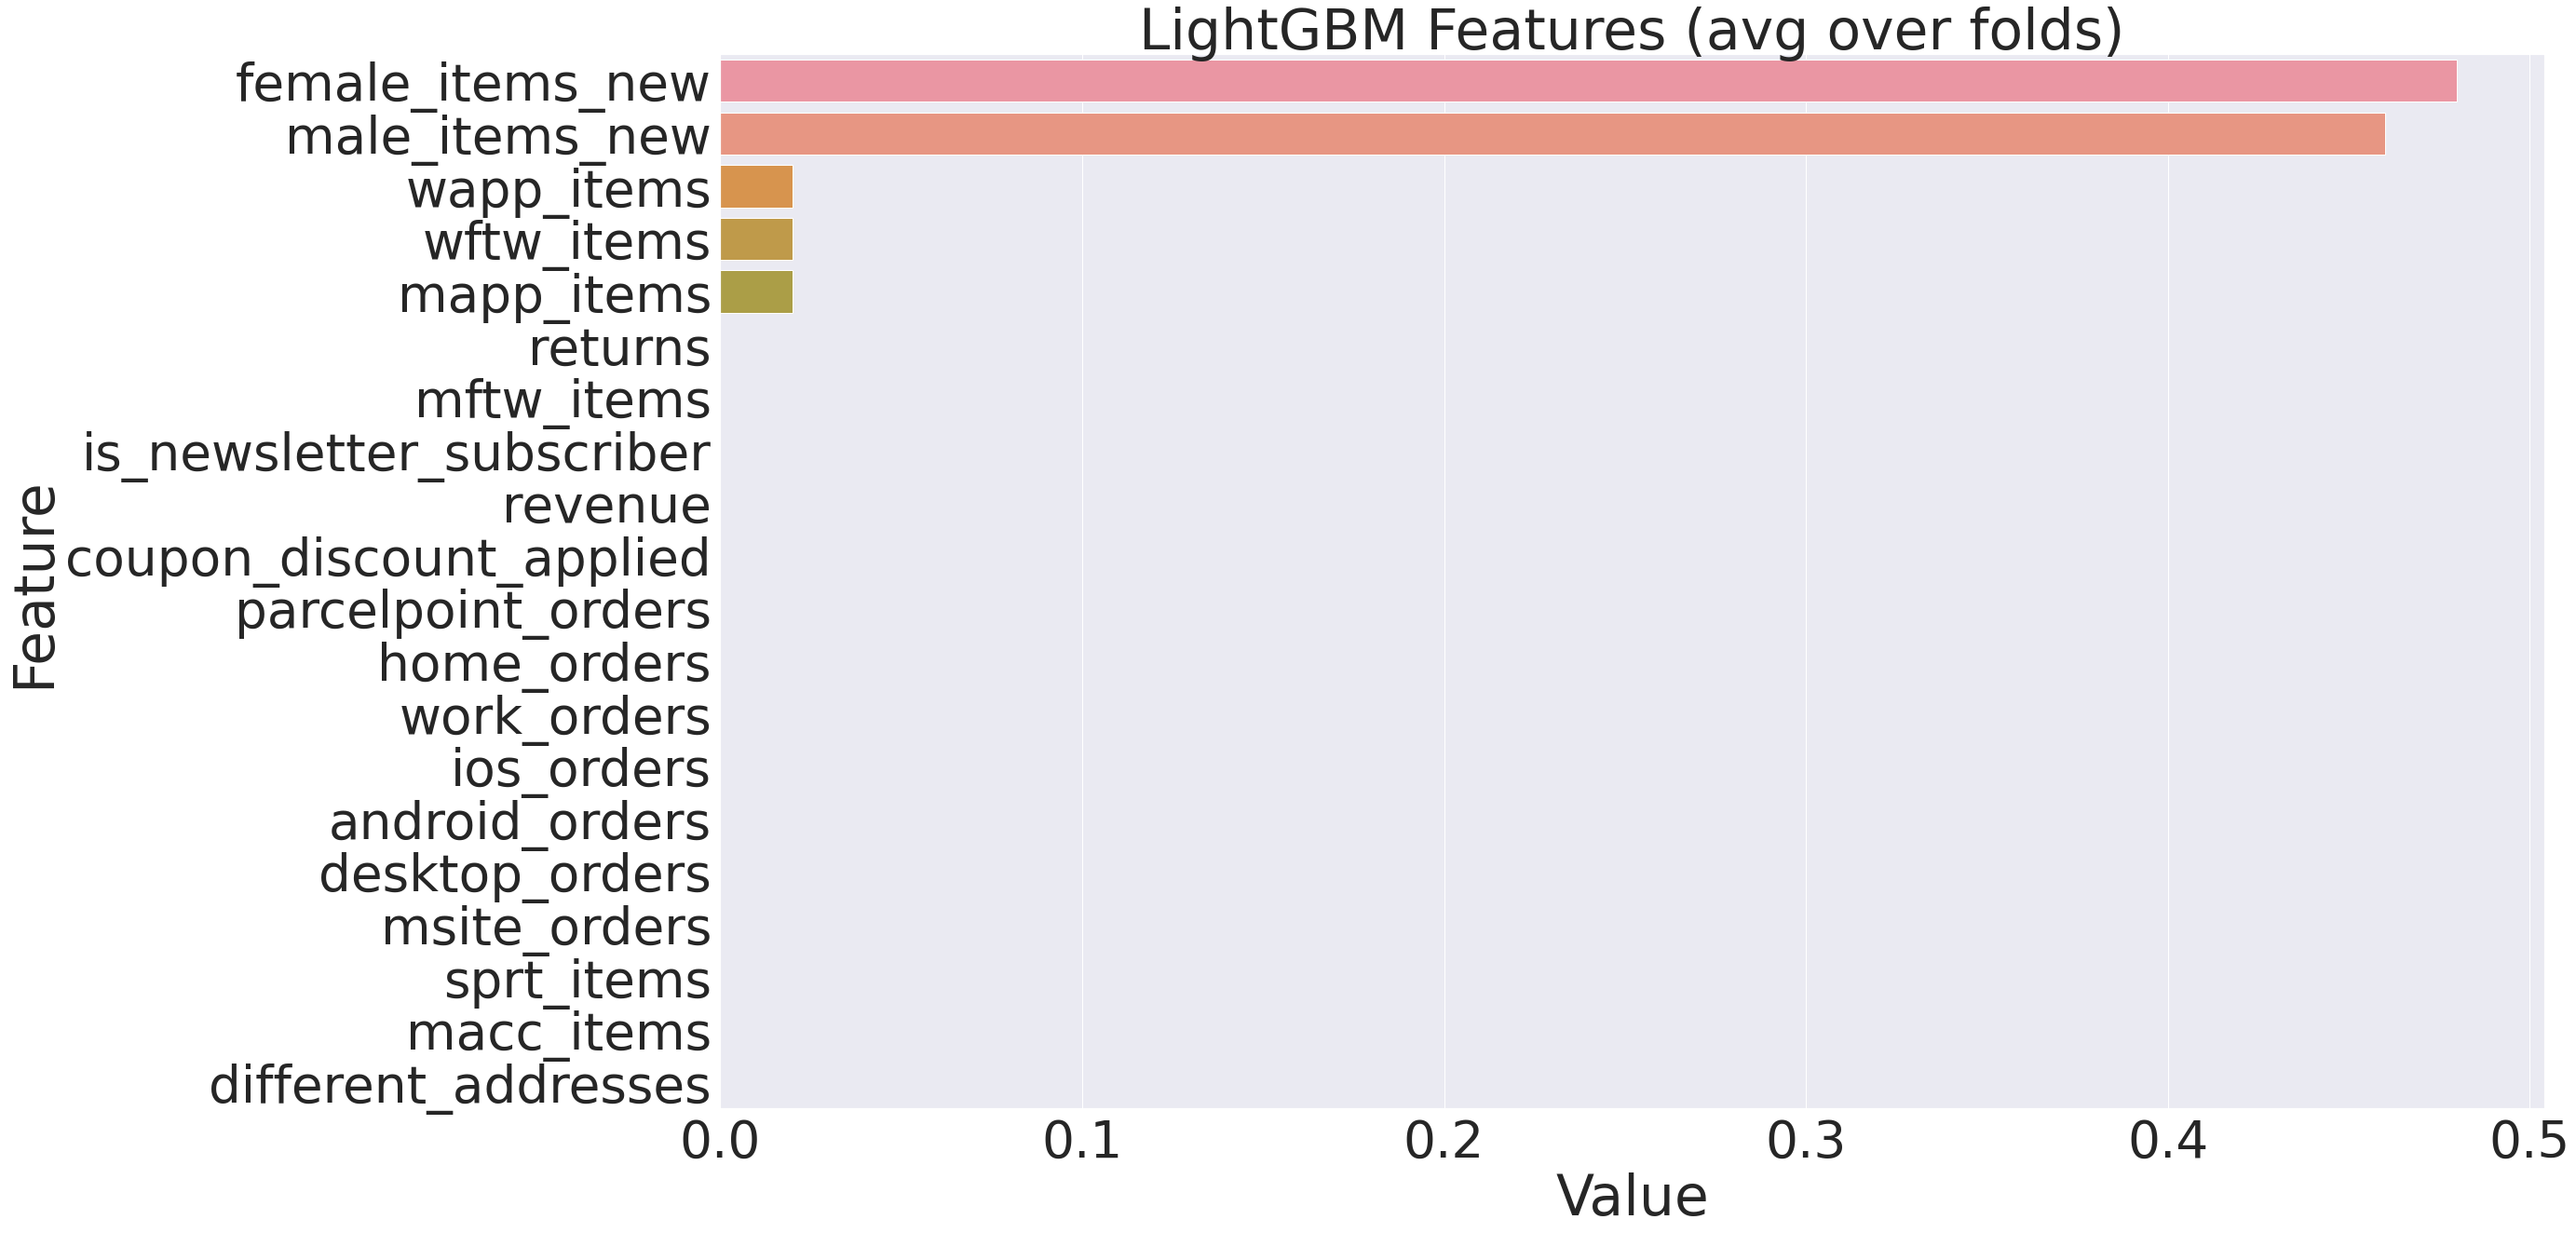

GBM
Balanced accuracy score: 1.0


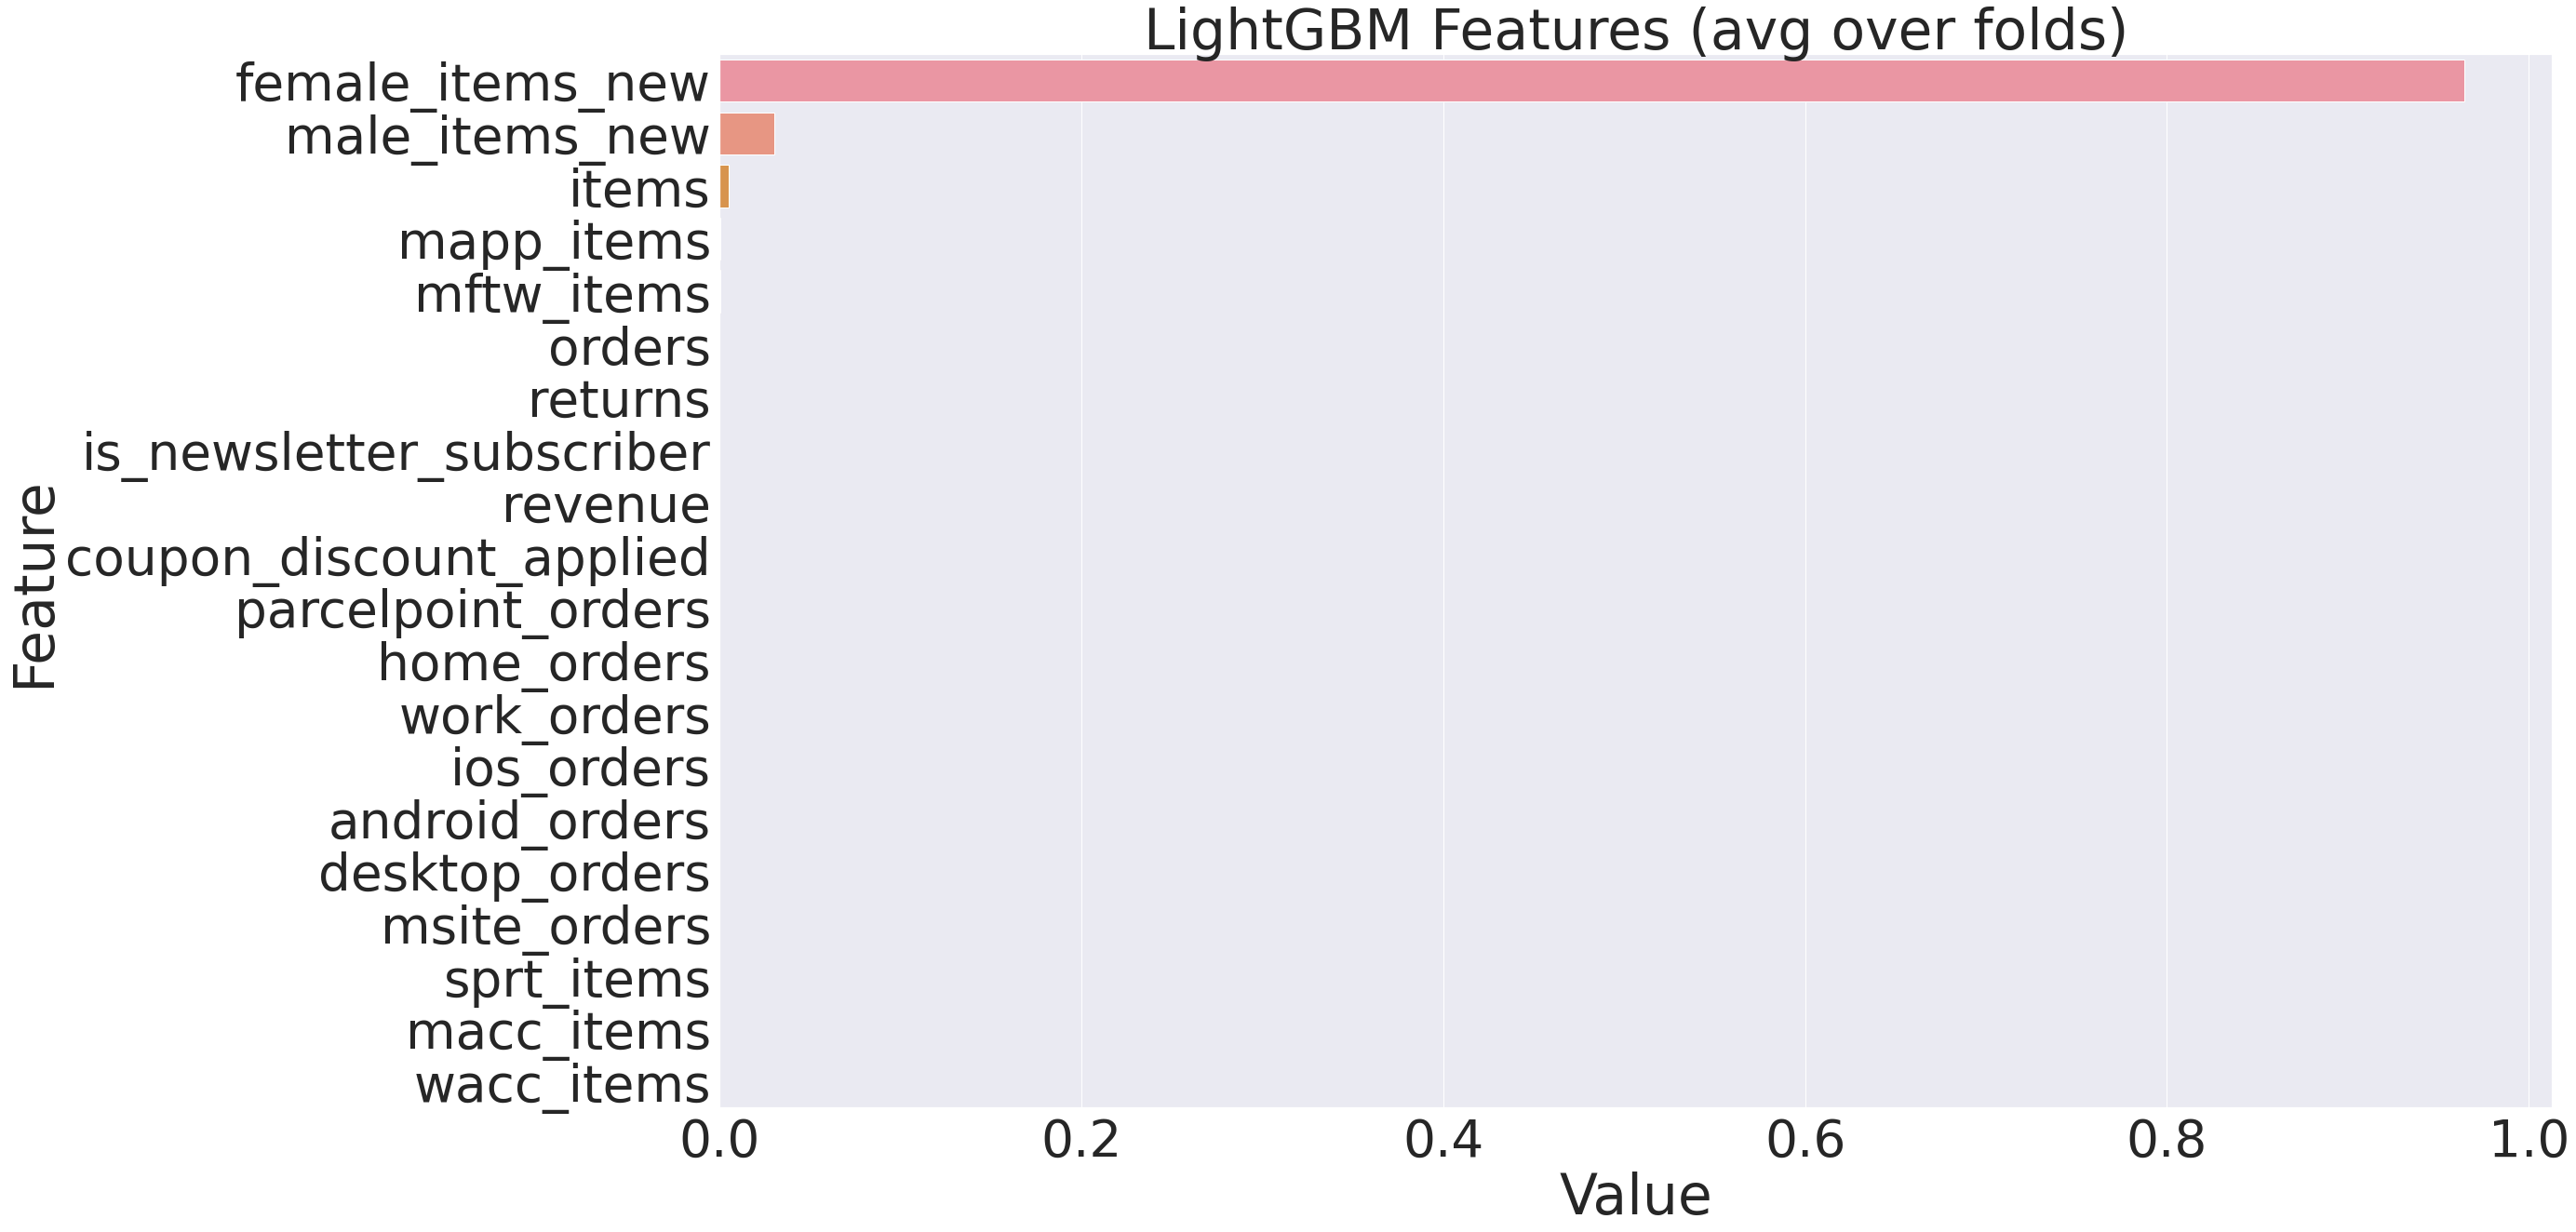

ET
Balanced accuracy score: 1.0


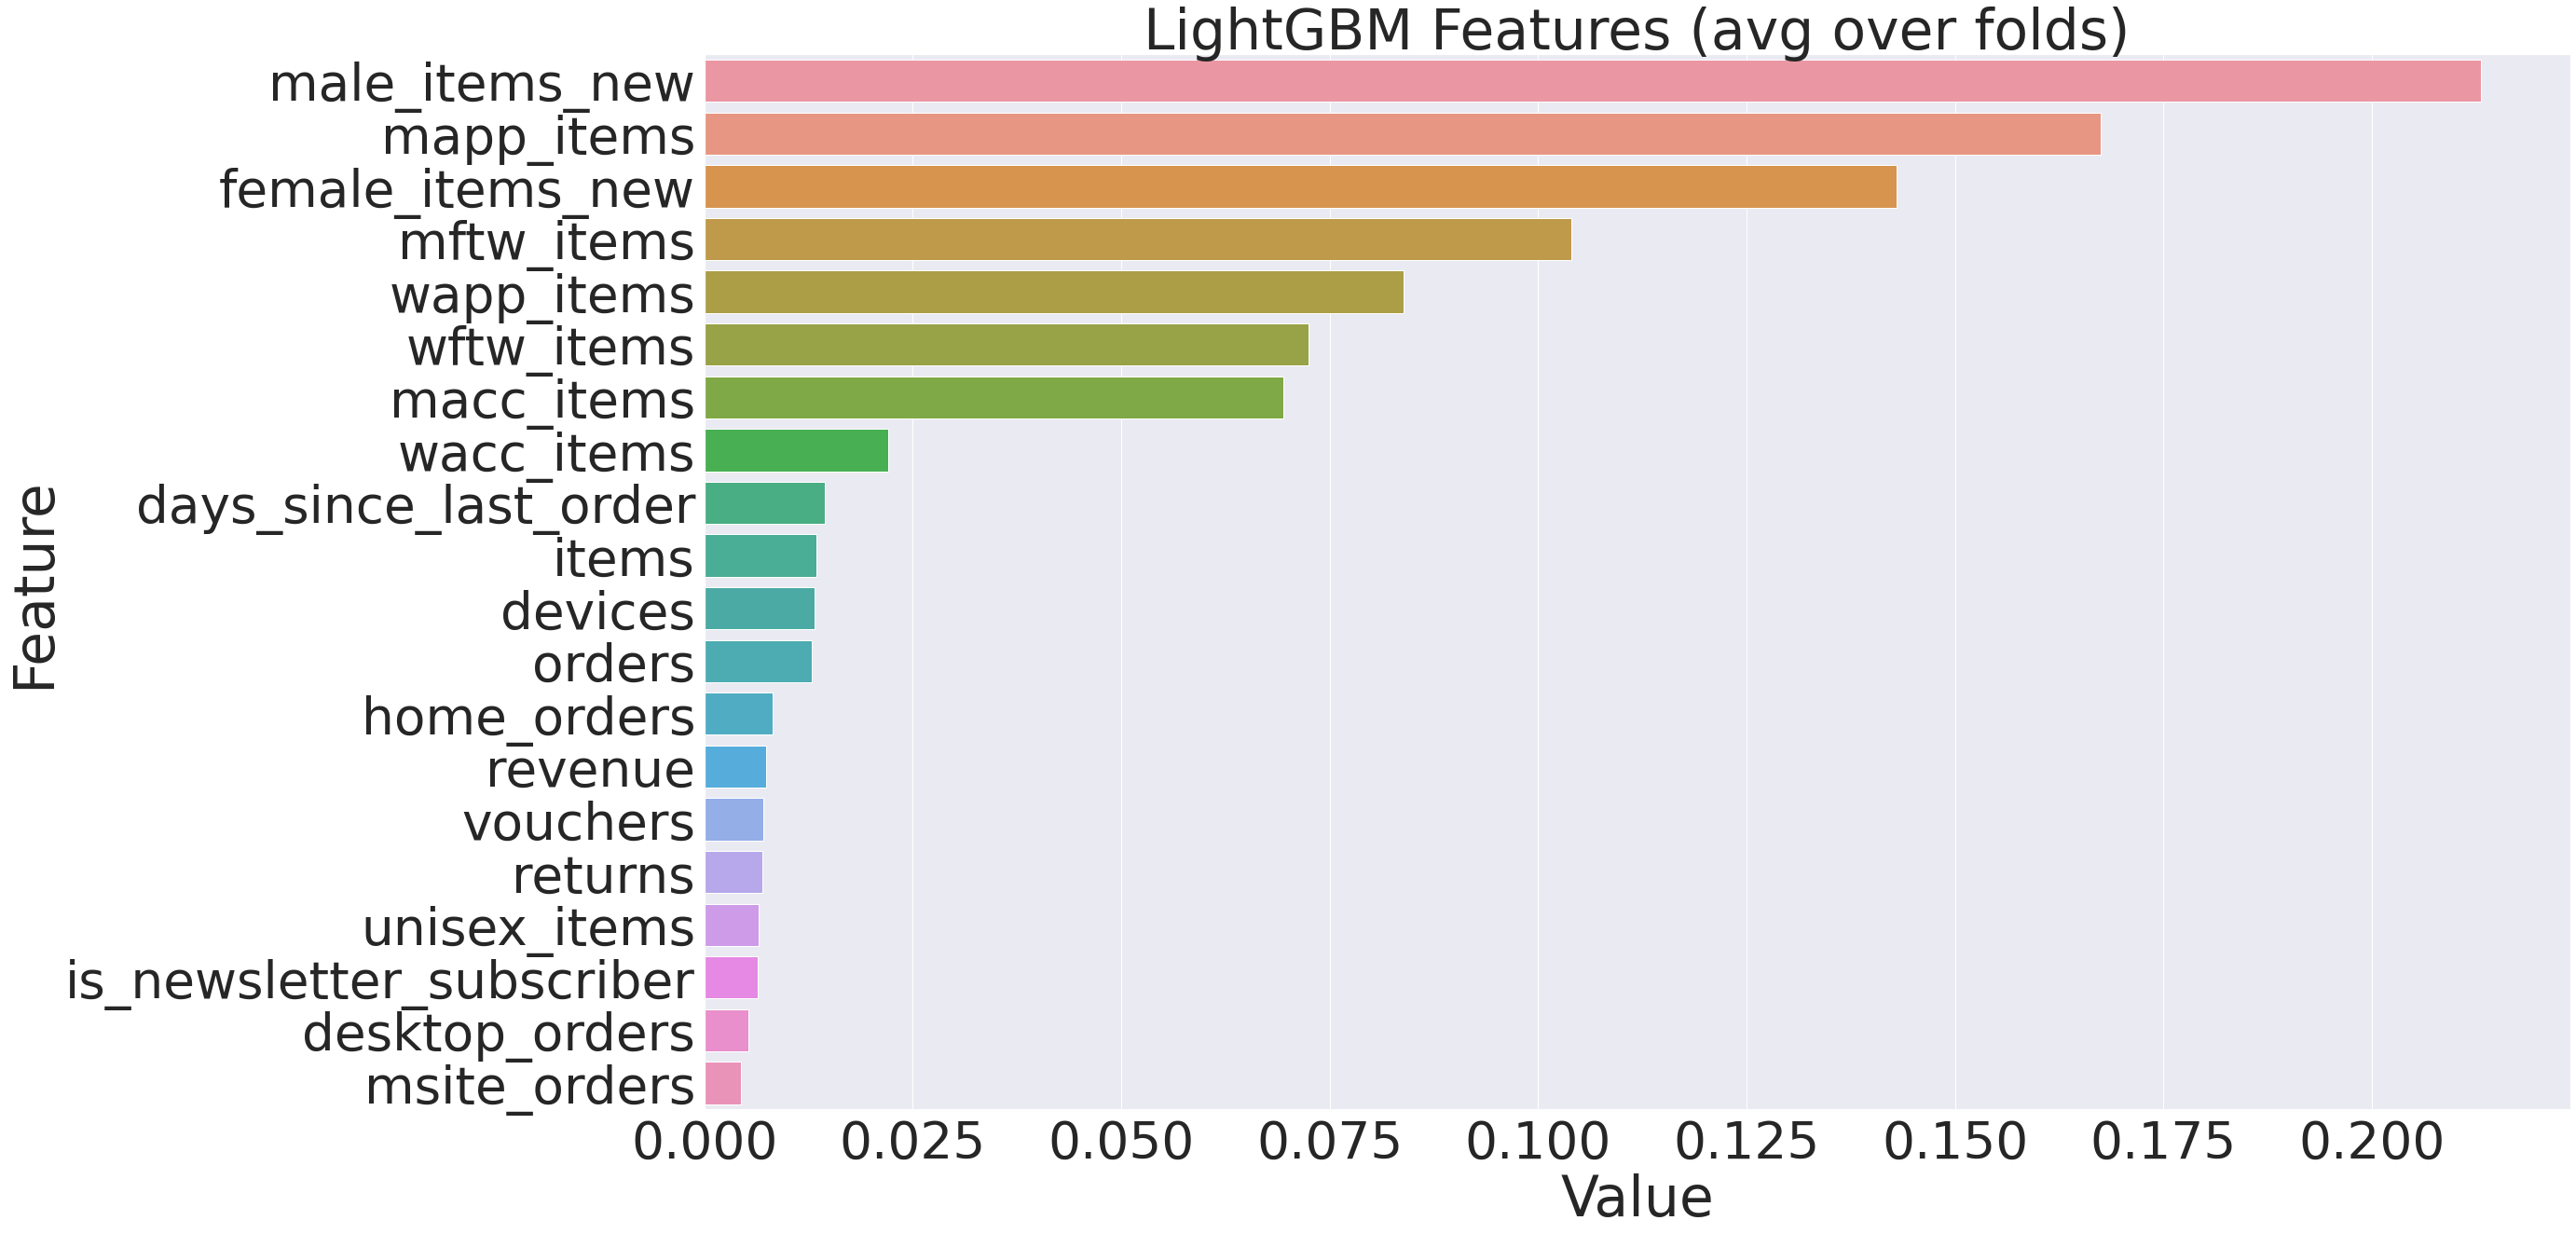

XGB
Balanced accuracy score: 1.0


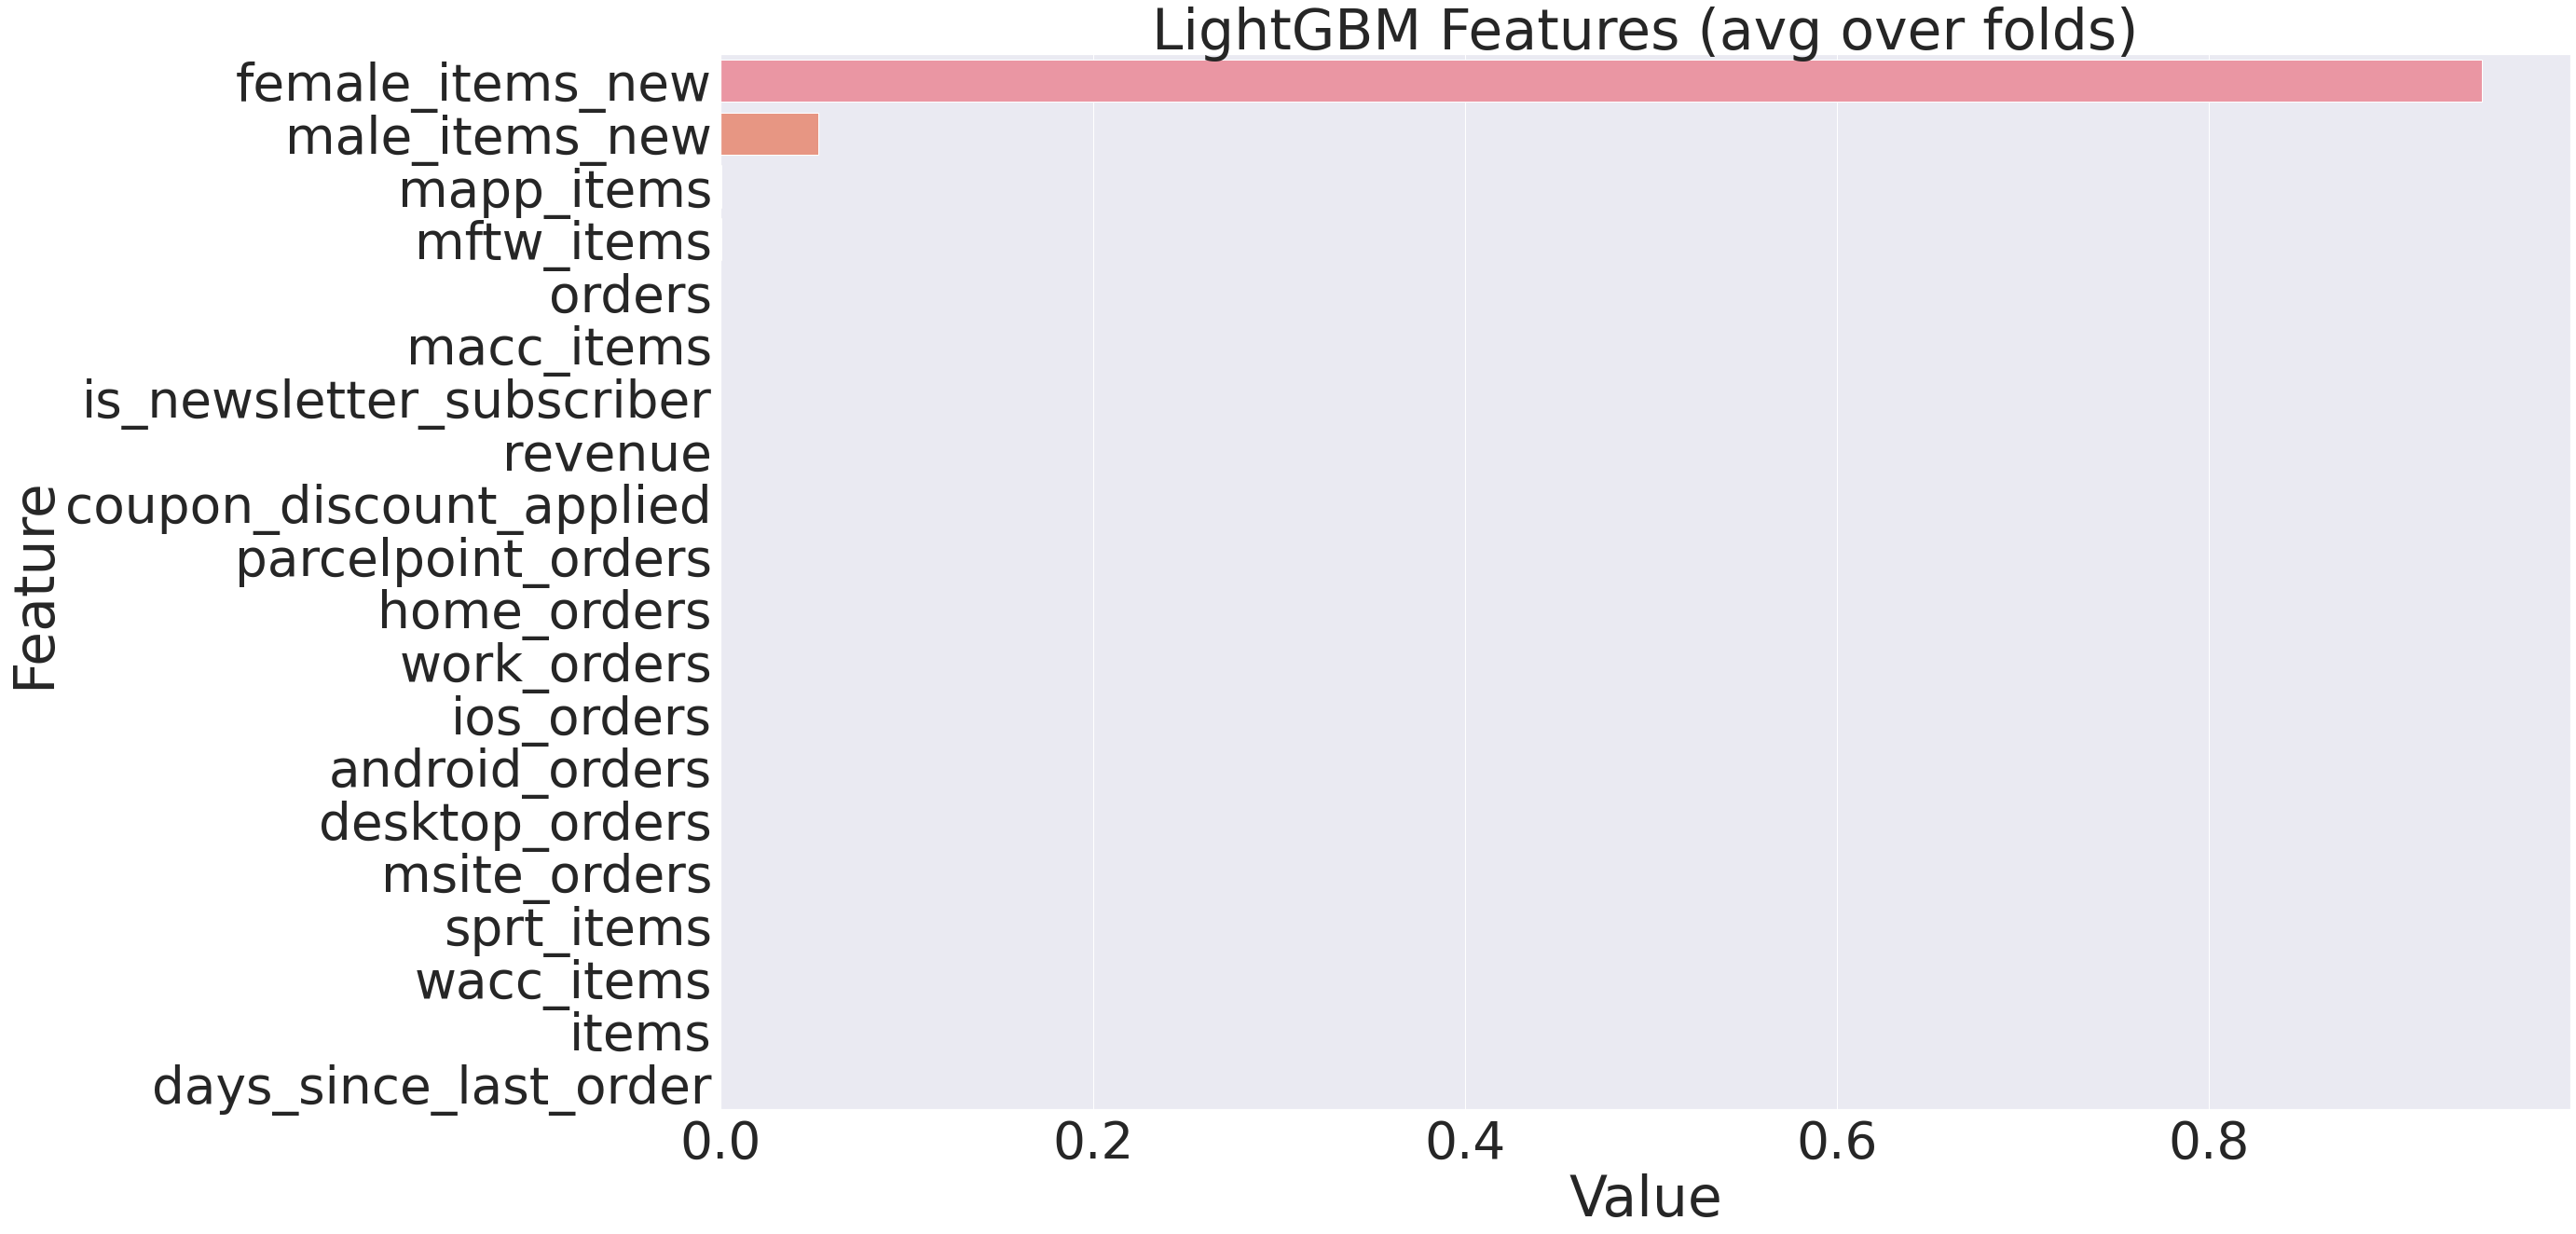

LGBM
Balanced accuracy score: 1.0


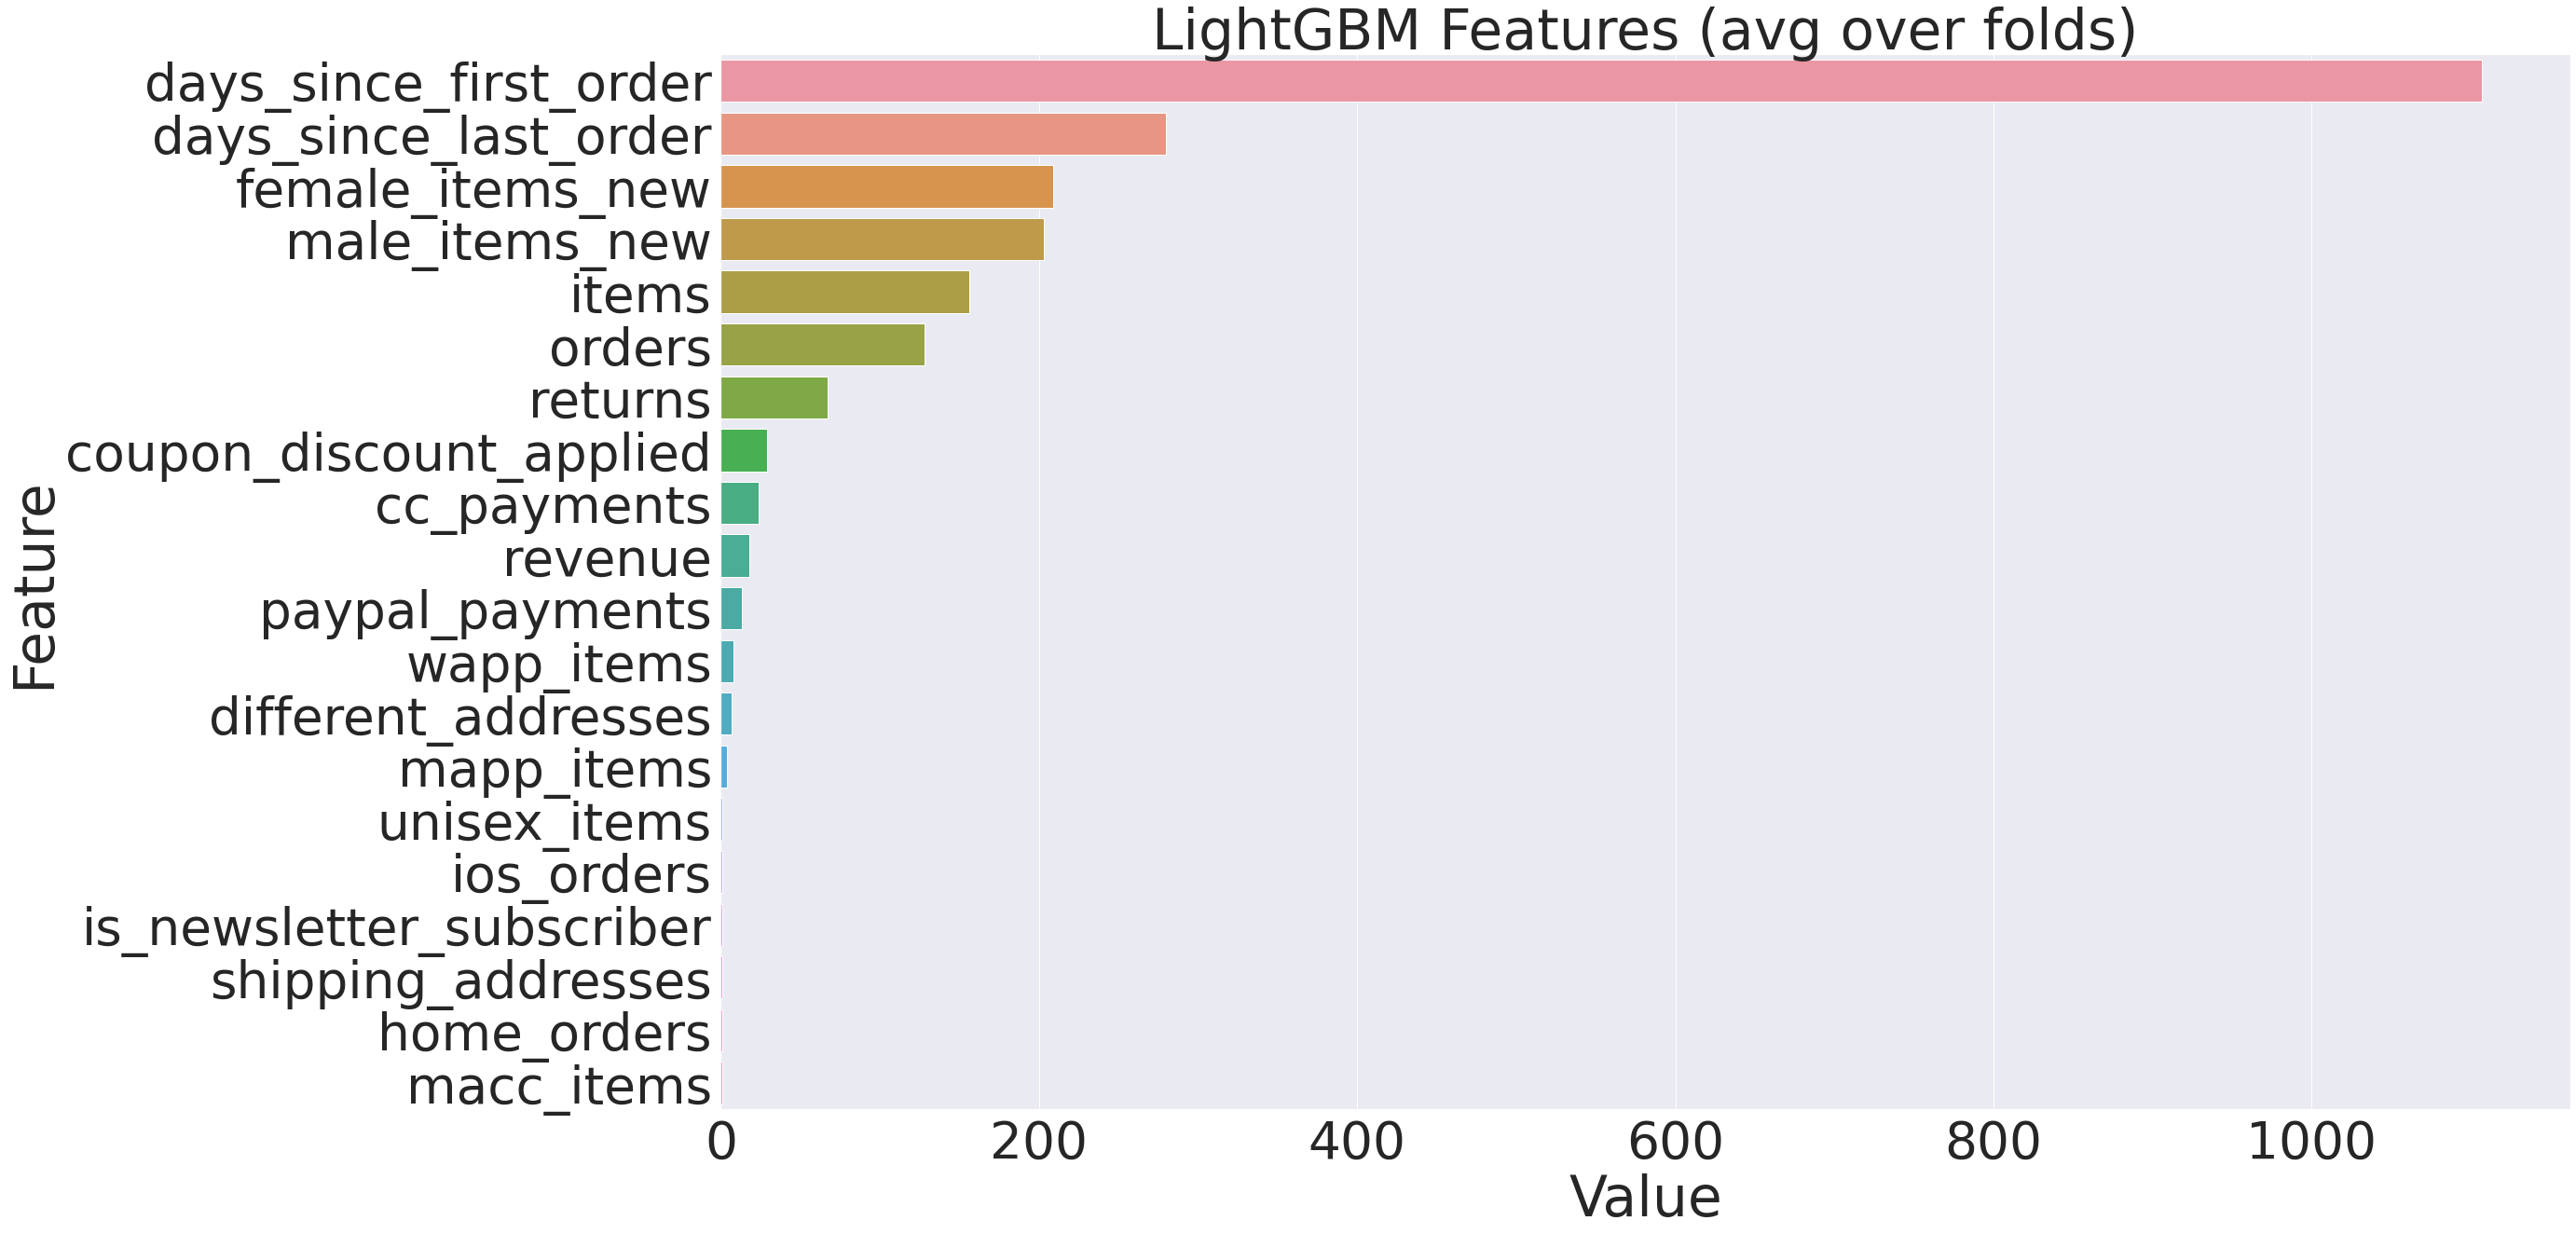

In [ ]:
for name, model in classifiers.items():
  print(name)
  model.fit(X_train,y_train)  
  y_pred = model.predict(X_test)
  print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
  #print(classification_report(y_test,y_pred))
  plotImp(model, X_train , num = 20)

# Try predict label with Semi supervised

In [25]:
df_final.head()

days_since_first_order  ...  gender
0                    2783  ...       0
2                    2773  ...       1
4                    1430  ...       0
5                    2764  ...       1
6                    2758  ...       1

[5 rows x 35 columns]

## Base model

In [26]:
X=df_final.drop(['gender','customer_id','percentage_female_items'],axis=1)
y=df_final['gender']
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)
# use stratify to ensure balanced gender ratio between train and test set
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(91195, 32) (91195,)
(22799, 32) (22799,)


In [28]:
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 1.0
Matthews_corrcoef accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3882
           1       1.00      1.00      1.00     18917

    accuracy                           1.00     22799
   macro avg       1.00      1.00      1.00     22799
weighted avg       1.00      1.00      1.00     22799



In [29]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, 
                                                     random_state = 42,stratify=y)
# use stratify to ensure balanced gender ratio between train and test set
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

(22798, 32) (22798,)
(91196, 32) (91196,)
Balanced accuracy score: 0.999967804249839
Matthews_corrcoef accuracy score: 0.9999611960220516
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15530
           1       1.00      1.00      1.00     75666

    accuracy                           1.00     91196
   macro avg       1.00      1.00      1.00     91196
weighted avg       1.00      1.00      1.00     91196



## Semi supervised with Label progapagation (crash Ram)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

In [30]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)

In [32]:
X=X_train
y=y_train

In [ ]:
n_total_samples = len(y)
indices = np.arange(n_total_samples)
print(indices.shape)
list_percentage=[0.1,0.2,0.3,0.4,0.5,0.7,0.8]
for i in list_percentage:
  print('Percentage true label: ',i)
  true_label_percentage=i
  n_labeled_points = int(true_label_percentage*n_total_samples) 
  print('n_labeled_points: ',n_labeled_points)
  unlabeled_set = indices[n_labeled_points:]
  print('unlabeled_set: ',unlabeled_set.shape)
  # Shuffle everything around
  y_train = np.copy(y)
  y_train[unlabeled_set] = -1
  # Learn with LabelSpreading
  lp_model = LabelSpreading(gamma=.25, max_iter=20)
  lp_model.fit(X, y_train)
  # prediction for unlabeled set only
  y_pred = lp_model.transduction_[unlabeled_set]
  y_test = y[unlabeled_set]

  print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
  print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
  print(classification_report(y_test,y_pred))

(91195,)
Percentage true label:  0.1
n_labeled_points:  9119
unlabeled_set:  (82076,)


# Try predict with clustering